# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:54:49.016462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:54:52.129667
2025-04-14 23:54:52.129667


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:54:47"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

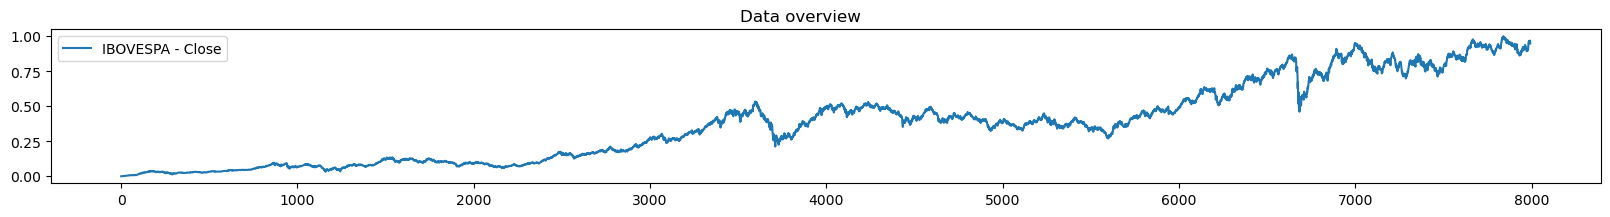

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

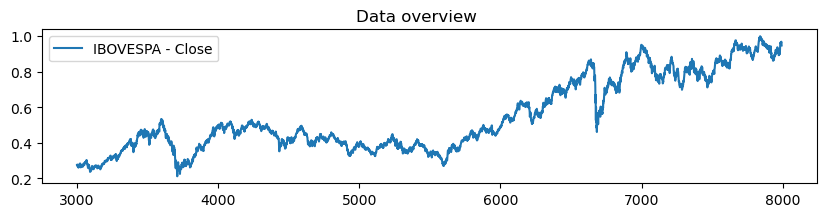

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

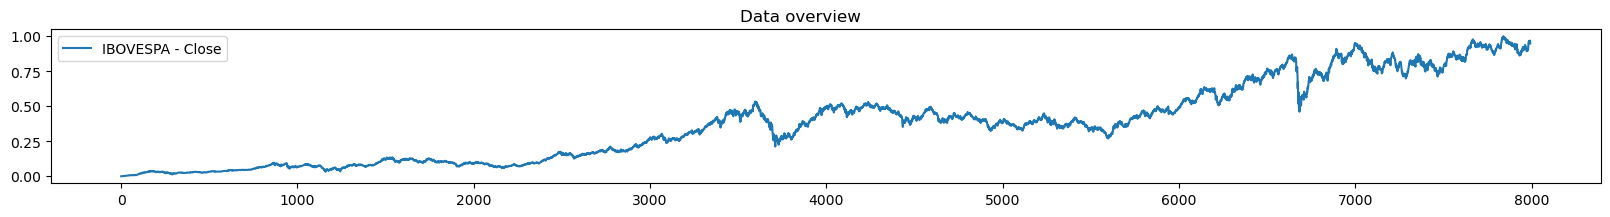

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

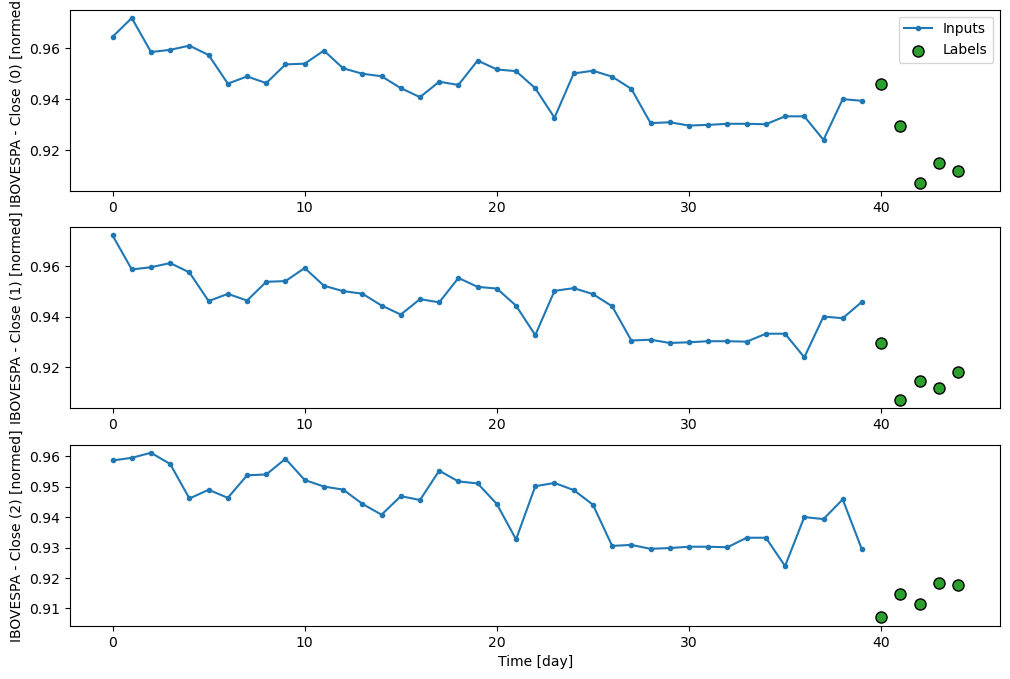

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24:11 6s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 70.2545 - mean_squared_error: 4.4759e-05 - root_mean_squared_error: 0.0067  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.3346 - mean_squared_error: 4.5469e-05 - root_mean_squared_error: 0.0067

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.0512 - mean_squared_error: 4.5064e-05 - root_mean_squared_error: 0.0067

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 48.1380 - mean_squared_error: 5.0064e-05 - root_mean_squared_error: 0.0070

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.9928 - mean_squared_error: 5.3121e-05 - root_mean_squared_error: 0.0072

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.9073 - mean_squared_error: 5.4009e-05 - root_mean_squared_error: 0.0073

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.0934 - mean_squared_error: 5.4109e-05 - root_mean_squared_error: 0.0073

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 41.2678 - mean_squared_error: 5.4014e-05 - root_mean_squared_error: 0.0073

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 39.7300 - mean_squared_error: 5.3614e-05 - root_mean_squared_error: 0.0073

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 38.3015 - mean_squared_error: 5.2954e-05 - root_mean_squared_error: 0.0072

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.9649 - mean_squared_error: 5.2091e-05 - root_mean_squared_error: 0.0072

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 35.7865 - mean_squared_error: 5.1739e-05 - root_mean_squared_error: 0.0072

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 34.7353 - mean_squared_error: 5.1950e-05 - root_mean_squared_error: 0.0072

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 33.8414 - mean_squared_error: 5.4321e-05 - root_mean_squared_error: 0.0073

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 33.0796 - mean_squared_error: 5.7737e-05 - root_mean_squared_error: 0.0075

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 32.3980 - mean_squared_error: 6.1366e-05 - root_mean_squared_error: 0.0077

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 31.7756 - mean_squared_error: 6.5019e-05 - root_mean_squared_error: 0.0079

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 31.2849 - mean_squared_error: 6.9649e-05 - root_mean_squared_error: 0.0082

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.9078 - mean_squared_error: 7.4900e-05 - root_mean_squared_error: 0.0084

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 30.5611 - mean_squared_error: 7.9850e-05 - root_mean_squared_error: 0.0087

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 30.2504 - mean_squared_error: 8.4938e-05 - root_mean_squared_error: 0.0089

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.9468 - mean_squared_error: 8.9487e-05 - root_mean_squared_error: 0.0091

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.6654 - mean_squared_error: 9.4544e-05 - root_mean_squared_error: 0.0093

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.4169 - mean_squared_error: 1.0152e-04 - root_mean_squared_error: 0.0096

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.1937 - mean_squared_error: 1.0983e-04 - root_mean_squared_error: 0.0099

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.9604 - mean_squared_error: 1.1712e-04 - root_mean_squared_error: 0.0102

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.7238 - mean_squared_error: 1.2361e-04 - root_mean_squared_error: 0.0105

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.4843 - mean_squared_error: 1.2937e-04 - root_mean_squared_error: 0.0107

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.2442 - mean_squared_error: 1.3449e-04 - root_mean_squared_error: 0.0109

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.1316 - mean_squared_error: 1.3699e-04 - root_mean_squared_error: 0.0110

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.9064 - mean_squared_error: 1.4157e-04 - root_mean_squared_error: 0.0112

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 27.7970 - mean_squared_error: 1.4374e-04 - root_mean_squared_error: 0.0113

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 27.6889 - mean_squared_error: 1.4581e-04 - root_mean_squared_error: 0.0114

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 27.5800 - mean_squared_error: 1.4775e-04 - root_mean_squared_error: 0.0114

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 27.4759 - mean_squared_error: 1.4966e-04 - root_mean_squared_error: 0.0115

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 27.2875 - mean_squared_error: 1.5353e-04 - root_mean_squared_error: 0.0117

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 27.1106 - mean_squared_error: 1.5720e-04 - root_mean_squared_error: 0.0118

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 26.9334 - mean_squared_error: 1.6051e-04 - root_mean_squared_error: 0.0120

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 26.7707 - mean_squared_error: 1.6395e-04 - root_mean_squared_error: 0.0121

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 26.6271 - mean_squared_error: 1.6822e-04 - root_mean_squared_error: 0.0123

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 26.5058 - mean_squared_error: 1.7490e-04 - root_mean_squared_error: 0.0125

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 26.4010 - mean_squared_error: 1.8343e-04 - root_mean_squared_error: 0.0127

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.3011 - mean_squared_error: 1.9196e-04 - root_mean_squared_error: 0.0130

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 26.2001 - mean_squared_error: 2.0005e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 26.0944 - mean_squared_error: 2.0753e-04 - root_mean_squared_error: 0.0134

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.9868 - mean_squared_error: 2.1464e-04 - root_mean_squared_error: 0.0137

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 25.8747 - mean_squared_error: 2.2119e-04 - root_mean_squared_error: 0.0139

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.7598 - mean_squared_error: 2.2731e-04 - root_mean_squared_error: 0.0140

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 25.6418 - mean_squared_error: 2.3297e-04 - root_mean_squared_error: 0.0142

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 25.5215 - mean_squared_error: 2.3827e-04 - root_mean_squared_error: 0.0144

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.4000 - mean_squared_error: 2.4327e-04 - root_mean_squared_error: 0.0145

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 25.2768 - mean_squared_error: 2.4796e-04 - root_mean_squared_error: 0.0147

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 25.1541 - mean_squared_error: 2.5257e-04 - root_mean_squared_error: 0.0148

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.0319 - mean_squared_error: 2.5720e-04 - root_mean_squared_error: 0.0150

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.9100 - mean_squared_error: 2.6178e-04 - root_mean_squared_error: 0.0151

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 24.7880 - mean_squared_error: 2.6625e-04 - root_mean_squared_error: 0.0152

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 24.6675 - mean_squared_error: 2.7113e-04 - root_mean_squared_error: 0.0154

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.5481 - mean_squared_error: 2.7635e-04 - root_mean_squared_error: 0.0155

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.4894 - mean_squared_error: 2.7941e-04 - root_mean_squared_error: 0.0156

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.4311 - mean_squared_error: 2.8249e-04 - root_mean_squared_error: 0.0157

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 24.3210 - mean_squared_error: 2.9134e-04 - root_mean_squared_error: 0.0159

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.2232 - mean_squared_error: 3.0464e-04 - root_mean_squared_error: 0.0162

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.1757 - mean_squared_error: 3.1138e-04 - root_mean_squared_error: 0.0164

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 24.0821 - mean_squared_error: 3.2511e-04 - root_mean_squared_error: 0.0166

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.0374 - mean_squared_error: 3.3282e-04 - root_mean_squared_error: 0.0168

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 23.9539 - mean_squared_error: 3.5306e-04 - root_mean_squared_error: 0.0172

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 23.8795 - mean_squared_error: 3.8362e-04 - root_mean_squared_error: 0.0177

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 23.8128 - mean_squared_error: 4.2302e-04 - root_mean_squared_error: 0.0182

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 23.7501 - mean_squared_error: 4.6509e-04 - root_mean_squared_error: 0.0188

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 23.6867 - mean_squared_error: 5.0577e-04 - root_mean_squared_error: 0.0194

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 23.6215 - mean_squared_error: 5.4458e-04 - root_mean_squared_error: 0.0199

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 23.5544 - mean_squared_error: 5.8161e-04 - root_mean_squared_error: 0.0204

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.4859 - mean_squared_error: 6.1698e-04 - root_mean_squared_error: 0.0209

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 23.4171 - mean_squared_error: 6.5098e-04 - root_mean_squared_error: 0.0214

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 23.3481 - mean_squared_error: 6.8369e-04 - root_mean_squared_error: 0.0219

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 23.2811 - mean_squared_error: 7.1657e-04 - root_mean_squared_error: 0.0224

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 23.2144 - mean_squared_error: 7.4863e-04 - root_mean_squared_error: 0.0228

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 23.1466 - mean_squared_error: 7.7930e-04 - root_mean_squared_error: 0.0232

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 23.0781 - mean_squared_error: 8.0868e-04 - root_mean_squared_error: 0.0237

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 23.0092 - mean_squared_error: 8.3690e-04 - root_mean_squared_error: 0.0241

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 22.9413 - mean_squared_error: 8.6436e-04 - root_mean_squared_error: 0.0245

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 22.8744 - mean_squared_error: 8.9110e-04 - root_mean_squared_error: 0.0248

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 22.8069 - mean_squared_error: 9.1673e-04 - root_mean_squared_error: 0.0252

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 22.7729 - mean_squared_error: 9.2913e-04 - root_mean_squared_error: 0.0254

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 22.7048 - mean_squared_error: 9.5322e-04 - root_mean_squared_error: 0.0257

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 22.6711 - mean_squared_error: 9.6500e-04 - root_mean_squared_error: 0.0259

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.6048 - mean_squared_error: 9.8836e-04 - root_mean_squared_error: 0.0263

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 22.5389 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0266    

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.4729 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0269

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.4066 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 22.3405 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0275

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.2758 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 22.2443 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 22.2131 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.1818 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 22.1195 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 22.0588 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 22.0292 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.9715 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 21.9154 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.8603 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 21.8066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.7540 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.7019 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 21.6504 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.5992 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.5477 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.4964 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0316

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.4452 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.3937 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.3420 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.2935 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 21.2473 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 21.2016 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 21.1563 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 21.1120 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 21.0689 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 21.0264 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.9836 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 20.9405 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.8978 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 20.8552 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.8124 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.7693 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0363

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 20.7265 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 20.6633 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370 - val_loss: 0.1833 - val_mean_absolute_error: 0.1833 - val_mean_absolute_percentage_error: 19.5306 - val_mean_squared_error: 0.0344 - val_root_mean_squared_error: 0.1854 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_absolute_percentage_error: 9682.1709 - mean_squared_error: 0.5193 - root_mean_squared_error: 0.7206

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7173 - mean_absolute_error: 0.7173 - mean_absolute_percentage_error: 8079.8848 - mean_squared_error: 0.5146 - root_mean_squared_error: 0.7173 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7103 - mean_absolute_error: 0.7103 - mean_absolute_percentage_error: 6850.1348 - mean_squared_error: 0.5048 - root_mean_squared_error: 0.7104

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 6060.5166 - mean_squared_error: 0.4933 - root_mean_squared_error: 0.7022

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6916 - mean_absolute_error: 0.6916 - mean_absolute_percentage_error: 5546.8359 - mean_squared_error: 0.4800 - root_mean_squared_error: 0.6924

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6826 - mean_absolute_error: 0.6826 - mean_absolute_percentage_error: 5172.2124 - mean_squared_error: 0.4712 - root_mean_squared_error: 0.6859

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6740 - mean_absolute_error: 0.6740 - mean_absolute_percentage_error: 4875.9399 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6817

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6642 - mean_absolute_error: 0.6642 - mean_absolute_percentage_error: 4627.1265 - mean_squared_error: 0.4575 - root_mean_squared_error: 0.6757

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 4408.0981 - mean_squared_error: 0.4477 - root_mean_squared_error: 0.6682

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6397 - mean_absolute_error: 0.6397 - mean_absolute_percentage_error: 4209.0469 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6590

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 4027.2715 - mean_squared_error: 0.4237 - root_mean_squared_error: 0.6490

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6105 - mean_absolute_error: 0.6105 - mean_absolute_percentage_error: 3861.1182 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6386

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5961 - mean_absolute_error: 0.5961 - mean_absolute_percentage_error: 3709.2664 - mean_squared_error: 0.3992 - root_mean_squared_error: 0.6283

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5818 - mean_absolute_error: 0.5818 - mean_absolute_percentage_error: 3569.2959 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6181

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5679 - mean_absolute_error: 0.5679 - mean_absolute_percentage_error: 3440.4082 - mean_squared_error: 0.3762 - root_mean_squared_error: 0.6081

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5547 - mean_absolute_error: 0.5547 - mean_absolute_percentage_error: 3321.7051 - mean_squared_error: 0.3655 - root_mean_squared_error: 0.5985

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5483 - mean_absolute_error: 0.5483 - mean_absolute_percentage_error: 3265.7175 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.5938

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 3211.7749 - mean_squared_error: 0.3554 - root_mean_squared_error: 0.5892

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5297 - mean_absolute_error: 0.5297 - mean_absolute_percentage_error: 3109.5127 - mean_squared_error: 0.3457 - root_mean_squared_error: 0.5802

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5179 - mean_absolute_error: 0.5179 - mean_absolute_percentage_error: 3014.3005 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5715

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5065 - mean_absolute_error: 0.5065 - mean_absolute_percentage_error: 2925.4312 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5632

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4956 - mean_absolute_error: 0.4956 - mean_absolute_percentage_error: 2842.2063 - mean_squared_error: 0.3196 - root_mean_squared_error: 0.5552

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - mean_absolute_percentage_error: 2764.1426 - mean_squared_error: 0.3118 - root_mean_squared_error: 0.5475

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2690.7620 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5400

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - mean_absolute_percentage_error: 2621.6331 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5329

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4564 - mean_absolute_error: 0.4564 - mean_absolute_percentage_error: 2556.3823 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5260

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2525.1035 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5227

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 2465.0625 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5162

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 2408.1606 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5100

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 2354.1445 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.5039

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 2302.7900 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4981

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 2253.9104 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4925

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 2207.3271 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4870

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 2162.8767 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4818

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3949 - mean_absolute_error: 0.3949 - mean_absolute_percentage_error: 2141.4092 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4792

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 2120.4238 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4767

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 2099.9041 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4742

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 2060.1877 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4694

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 2022.1472 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4647

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1985.6752 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1950.6633 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4557

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1917.0183 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4514

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1884.6643 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4473

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1853.5385 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4432

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1823.5615 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4393

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1794.6610 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4355

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1766.7792 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4317

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1739.8586 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4281

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1713.8495 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4246

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1688.7048 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4211

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1664.3804 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4178

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1640.8359 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4145

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1618.0344 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4113

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1595.9359 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4082

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1574.5073 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4052

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1553.7209 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4022

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1533.5485 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3993

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1513.9629 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3965

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1494.9366 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3937

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1476.4448 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3910

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 1458.4659 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3884

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1440.9899 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3858

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1423.9919 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3833

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1407.4438 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3809

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1391.3239 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3785

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1375.6157 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3761

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1360.3040 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3739

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1345.3717 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3716

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1330.8051 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3694

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1316.5902 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3672

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1302.7128 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3651

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1289.1606 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3630

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1275.9250 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3610

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1262.9946 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3590

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1250.3557 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3570

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1237.9996 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3550

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1225.9165 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3531

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1214.0959 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3513

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1208.2810 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3503

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1202.5283 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3494

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1196.8370 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3485

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1191.2065 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3476

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1185.6356 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3467

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1180.1229 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3458

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1169.2682 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3441

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1163.9244 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3432

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1158.6355 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3424

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1153.4001 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3415

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1148.2179 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3407

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1143.0879 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3398

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1138.0096 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3390

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1132.9821 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3382

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1128.0042 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3373

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1123.0750 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3365

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1118.1940 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3357

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1113.3606 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3349

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1103.8334 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3333

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1099.1381 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3326

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1094.4874 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3318

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1089.8809 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3310

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1085.3184 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3303

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1080.7987 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3295

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1071.8846 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3280

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1067.4893 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3273

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1058.8195 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3258

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1050.3075 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3243

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1041.9493 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3229

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1033.7404 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3215

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1025.6769 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3201

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1017.7553 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3188

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1009.9722 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3175

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1002.3234 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3161

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 994.8045 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3149 

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 987.4128 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3136

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 980.1454 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3124

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 972.9989 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3112

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 965.9703 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3100

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 959.0568 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3088

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 952.2552 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3077

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 945.5610 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3066

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 938.9722 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3055

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 932.4866 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3044

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 926.1021 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3033

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 919.8163 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.3023

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 913.6269 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3012

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 907.5306 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3002

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 901.5250 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2992

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 895.6079 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2983

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 889.7770 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2973

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 886.8934 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2968

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 881.1881 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2959

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 878.3661 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2954

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 872.7827 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2944

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 870.0206 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2940

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 864.5577 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2930

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 861.8602 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2926 - val_loss: 0.1104 - val_mean_absolute_error: 0.1104 - val_mean_absolute_percentage_error: 11.7256 - val_mean_squared_error: 0.0130 - val_root_mean_squared_error: 0.1140 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.8167 - mean_absolute_error: 0.8167 - mean_absolute_percentage_error: 10973.2383 - mean_squared_error: 0.6670 - root_mean_squared_error: 0.8167

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8143 - mean_absolute_error: 0.8143 - mean_absolute_percentage_error: 9165.2285 - mean_squared_error: 0.6632 - root_mean_squared_error: 0.8143  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8099 - mean_absolute_error: 0.8099 - mean_absolute_percentage_error: 7782.4121 - mean_squared_error: 0.6560 - root_mean_squared_error: 0.8099

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8060 - mean_absolute_error: 0.8060 - mean_absolute_percentage_error: 6905.8169 - mean_squared_error: 0.6498 - root_mean_squared_error: 0.8061

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8029 - mean_absolute_error: 0.8029 - mean_absolute_percentage_error: 6360.4990 - mean_squared_error: 0.6448 - root_mean_squared_error: 0.8030

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8000 - mean_absolute_error: 0.8000 - mean_absolute_percentage_error: 5967.9258 - mean_squared_error: 0.6402 - root_mean_squared_error: 0.8001

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7970 - mean_absolute_error: 0.7970 - mean_absolute_percentage_error: 5657.2568 - mean_squared_error: 0.6355 - root_mean_squared_error: 0.7971

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7939 - mean_absolute_error: 0.7939 - mean_absolute_percentage_error: 5402.9321 - mean_squared_error: 0.6308 - root_mean_squared_error: 0.7941

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7907 - mean_absolute_error: 0.7907 - mean_absolute_percentage_error: 5184.9238 - mean_squared_error: 0.6258 - root_mean_squared_error: 0.7909

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7890 - mean_absolute_error: 0.7890 - mean_absolute_percentage_error: 5086.0234 - mean_squared_error: 0.6233 - root_mean_squared_error: 0.7893

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7873 - mean_absolute_error: 0.7873 - mean_absolute_percentage_error: 4992.4854 - mean_squared_error: 0.6207 - root_mean_squared_error: 0.7876

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7856 - mean_absolute_error: 0.7856 - mean_absolute_percentage_error: 4903.8311 - mean_squared_error: 0.6180 - root_mean_squared_error: 0.7859

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7837 - mean_absolute_error: 0.7837 - mean_absolute_percentage_error: 4819.5913 - mean_squared_error: 0.6153 - root_mean_squared_error: 0.7842

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7819 - mean_absolute_error: 0.7819 - mean_absolute_percentage_error: 4739.3408 - mean_squared_error: 0.6125 - root_mean_squared_error: 0.7824

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7780 - mean_absolute_error: 0.7780 - mean_absolute_percentage_error: 4588.2710 - mean_squared_error: 0.6068 - root_mean_squared_error: 0.7786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7737 - mean_absolute_error: 0.7737 - mean_absolute_percentage_error: 4447.5747 - mean_squared_error: 0.6006 - root_mean_squared_error: 0.7746

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7715 - mean_absolute_error: 0.7715 - mean_absolute_percentage_error: 4380.6665 - mean_squared_error: 0.5975 - root_mean_squared_error: 0.7724

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7692 - mean_absolute_error: 0.7692 - mean_absolute_percentage_error: 4315.9624 - mean_squared_error: 0.5942 - root_mean_squared_error: 0.7703

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7668 - mean_absolute_error: 0.7668 - mean_absolute_percentage_error: 4253.5703 - mean_squared_error: 0.5909 - root_mean_squared_error: 0.7680

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7643 - mean_absolute_error: 0.7643 - mean_absolute_percentage_error: 4193.3477 - mean_squared_error: 0.5874 - root_mean_squared_error: 0.7657

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7617 - mean_absolute_error: 0.7617 - mean_absolute_percentage_error: 4135.1113 - mean_squared_error: 0.5840 - root_mean_squared_error: 0.7633

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 4023.9409 - mean_squared_error: 0.5767 - root_mean_squared_error: 0.7584

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 3919.5381 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7531

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.7437 - mean_absolute_error: 0.7437 - mean_absolute_percentage_error: 3821.5139 - mean_squared_error: 0.5613 - root_mean_squared_error: 0.7476

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_absolute_percentage_error: 3728.6982 - mean_squared_error: 0.5532 - root_mean_squared_error: 0.7418

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 3683.9241 - mean_squared_error: 0.5490 - root_mean_squared_error: 0.7389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 3640.2085 - mean_squared_error: 0.5449 - root_mean_squared_error: 0.7358

 42/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - mean_absolute_percentage_error: 3597.5510 - mean_squared_error: 0.5407 - root_mean_squared_error: 0.7328

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.7207 - mean_absolute_error: 0.7207 - mean_absolute_percentage_error: 3555.9395 - mean_squared_error: 0.5365 - root_mean_squared_error: 0.7297

 44/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.7166 - mean_absolute_error: 0.7166 - mean_absolute_percentage_error: 3515.3521 - mean_squared_error: 0.5324 - root_mean_squared_error: 0.7266

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.7124 - mean_absolute_error: 0.7124 - mean_absolute_percentage_error: 3475.7578 - mean_squared_error: 0.5282 - root_mean_squared_error: 0.7236

 47/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.7040 - mean_absolute_error: 0.7040 - mean_absolute_percentage_error: 3399.4165 - mean_squared_error: 0.5200 - root_mean_squared_error: 0.7174

 49/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 3326.6555 - mean_squared_error: 0.5119 - root_mean_squared_error: 0.7113

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6874 - mean_absolute_error: 0.6874 - mean_absolute_percentage_error: 3257.2095 - mean_squared_error: 0.5040 - root_mean_squared_error: 0.7052 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6791 - mean_absolute_error: 0.6791 - mean_absolute_percentage_error: 3190.8123 - mean_squared_error: 0.4962 - root_mean_squared_error: 0.6992

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6749 - mean_absolute_error: 0.6749 - mean_absolute_percentage_error: 3158.6887 - mean_squared_error: 0.4924 - root_mean_squared_error: 0.6962

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6708 - mean_absolute_error: 0.6708 - mean_absolute_percentage_error: 3127.2651 - mean_squared_error: 0.4886 - root_mean_squared_error: 0.6933

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 3066.4502 - mean_squared_error: 0.4812 - root_mean_squared_error: 0.6874

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6585 - mean_absolute_error: 0.6585 - mean_absolute_percentage_error: 3037.0242 - mean_squared_error: 0.4776 - root_mean_squared_error: 0.6845

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6505 - mean_absolute_error: 0.6505 - mean_absolute_percentage_error: 2980.0601 - mean_squared_error: 0.4704 - root_mean_squared_error: 0.6788

 62/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6426 - mean_absolute_error: 0.6426 - mean_absolute_percentage_error: 2925.4321 - mean_squared_error: 0.4635 - root_mean_squared_error: 0.6732

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6387 - mean_absolute_error: 0.6387 - mean_absolute_percentage_error: 2898.9397 - mean_squared_error: 0.4601 - root_mean_squared_error: 0.6704

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6349 - mean_absolute_error: 0.6349 - mean_absolute_percentage_error: 2872.9700 - mean_squared_error: 0.4567 - root_mean_squared_error: 0.6677

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6310 - mean_absolute_error: 0.6310 - mean_absolute_percentage_error: 2847.5088 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6650

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 2822.5437 - mean_squared_error: 0.4501 - root_mean_squared_error: 0.6623

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6197 - mean_absolute_error: 0.6197 - mean_absolute_percentage_error: 2774.0544 - mean_squared_error: 0.4437 - root_mean_squared_error: 0.6570

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6160 - mean_absolute_error: 0.6160 - mean_absolute_percentage_error: 2750.5066 - mean_squared_error: 0.4406 - root_mean_squared_error: 0.6544

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.6087 - mean_absolute_error: 0.6087 - mean_absolute_percentage_error: 2704.7332 - mean_squared_error: 0.4344 - root_mean_squared_error: 0.6492

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 2660.6365 - mean_squared_error: 0.4284 - root_mean_squared_error: 0.6442

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 2618.1184 - mean_squared_error: 0.4226 - root_mean_squared_error: 0.6392

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - mean_absolute_percentage_error: 2577.0938 - mean_squared_error: 0.4170 - root_mean_squared_error: 0.6344

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.5809 - mean_absolute_error: 0.5809 - mean_absolute_percentage_error: 2537.4841 - mean_squared_error: 0.4115 - root_mean_squared_error: 0.6296

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 2499.2268 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.5680 - mean_absolute_error: 0.5680 - mean_absolute_percentage_error: 2462.2473 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6204

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.5617 - mean_absolute_error: 0.5617 - mean_absolute_percentage_error: 2426.4771 - mean_squared_error: 0.3959 - root_mean_squared_error: 0.6160

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.5556 - mean_absolute_error: 0.5556 - mean_absolute_percentage_error: 2391.8560 - mean_squared_error: 0.3909 - root_mean_squared_error: 0.6116

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.5496 - mean_absolute_error: 0.5496 - mean_absolute_percentage_error: 2358.3257 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6073

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 2325.8372 - mean_squared_error: 0.3815 - root_mean_squared_error: 0.6031

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.5380 - mean_absolute_error: 0.5380 - mean_absolute_percentage_error: 2294.3430 - mean_squared_error: 0.3769 - root_mean_squared_error: 0.5990

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.5324 - mean_absolute_error: 0.5324 - mean_absolute_percentage_error: 2263.7979 - mean_squared_error: 0.3725 - root_mean_squared_error: 0.5950

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.5269 - mean_absolute_error: 0.5269 - mean_absolute_percentage_error: 2234.1570 - mean_squared_error: 0.3682 - root_mean_squared_error: 0.5911

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.5216 - mean_absolute_error: 0.5216 - mean_absolute_percentage_error: 2205.3799 - mean_squared_error: 0.3639 - root_mean_squared_error: 0.5872

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.5164 - mean_absolute_error: 0.5164 - mean_absolute_percentage_error: 2177.4250 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5834

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.5113 - mean_absolute_error: 0.5113 - mean_absolute_percentage_error: 2150.2571 - mean_squared_error: 0.3558 - root_mean_squared_error: 0.5797

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 2123.8447 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5760

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.5014 - mean_absolute_error: 0.5014 - mean_absolute_percentage_error: 2098.1570 - mean_squared_error: 0.3481 - root_mean_squared_error: 0.5724

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4966 - mean_absolute_error: 0.4966 - mean_absolute_percentage_error: 2073.1633 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5689

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4920 - mean_absolute_error: 0.4920 - mean_absolute_percentage_error: 2048.8337 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5655

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 2036.9095 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5638

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 2013.5271 - mean_squared_error: 0.3354 - root_mean_squared_error: 0.5604

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 2002.0677 - mean_squared_error: 0.3337 - root_mean_squared_error: 0.5588

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 1979.6023 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5555

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 1957.7157 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5523

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - mean_absolute_percentage_error: 1946.9790 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5508

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 1936.3755 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5492

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 1925.9017 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5477

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4666 - mean_absolute_error: 0.4666 - mean_absolute_percentage_error: 1915.5552 - mean_squared_error: 0.3207 - root_mean_squared_error: 0.5462

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4628 - mean_absolute_error: 0.4628 - mean_absolute_percentage_error: 1895.2355 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5432

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 1885.2579 - mean_squared_error: 0.3161 - root_mean_squared_error: 0.5417

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - mean_absolute_percentage_error: 1865.6559 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5388

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1846.5090 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5359

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - mean_absolute_percentage_error: 1827.8019 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5331

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 1809.5176 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5303

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 1791.6414 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5275

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 1774.1624 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5248

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 1765.5685 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5235

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 1757.0690 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5222

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 1748.6621 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5209

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4329 - mean_absolute_error: 0.4329 - mean_absolute_percentage_error: 1740.3457 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5196

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 1732.1179 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5183

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 1723.9780 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5170

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 1715.9246 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5158

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 1707.9557 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5145

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 1700.0698 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5133

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1692.2656 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5120

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4204 - mean_absolute_error: 0.4204 - mean_absolute_percentage_error: 1676.8976 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5096

152/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 1661.8409 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5072

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4145 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 1647.0868 - mean_squared_error: 0.2795 - root_mean_squared_error: 0.5048

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 1639.8199 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5036

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 1625.5007 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.5013

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 1611.4611 - mean_squared_error: 0.2739 - root_mean_squared_error: 0.4990

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 1597.6921 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.4967

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 1584.1870 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.4945

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 1570.9373 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4923

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 1557.9349 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4901

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 1545.1727 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4880

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3914 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 1532.6443 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4859

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 1520.3438 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4838

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3864 - mean_absolute_error: 0.3864 - mean_absolute_percentage_error: 1508.2660 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4817

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3839 - mean_absolute_error: 0.3839 - mean_absolute_percentage_error: 1496.4026 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4797

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 1484.7484 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4777

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 1473.2988 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4757

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1462.0482 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4738

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1450.9910 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4719

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1440.1216 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4700

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 1429.4352 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4681

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 1418.9271 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4663

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1408.5924 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4644

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 1398.4259 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4627

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1388.4231 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4609

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1378.5801 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4591

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1368.8929 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4574

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3557 - mean_absolute_error: 0.3557 - mean_absolute_percentage_error: 1359.3578 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4557

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1349.9708 - mean_squared_error: 0.2325 - root_mean_squared_error: 0.4540

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1340.7288 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4523

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1331.6304 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4507

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1322.6715 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4490

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1313.8483 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4474

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1305.1565 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4459

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1296.5928 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4443

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1288.1547 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4427

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1279.8391 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4412

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1271.6439 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4397

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1263.5658 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4382

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1255.6025 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4367

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1247.7513 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4352

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1240.0095 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4338

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1232.3746 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4324

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1221.1188 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4302

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1213.7578 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4289 - val_loss: 0.1711 - val_mean_absolute_error: 0.1711 - val_mean_absolute_percentage_error: 18.2221 - val_mean_squared_error: 0.0301 - val_root_mean_squared_error: 0.1734 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 10161.6406 - mean_squared_error: 0.5720 - root_mean_squared_error: 0.7563

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7499 - mean_absolute_error: 0.7499 - mean_absolute_percentage_error: 7762.8193 - mean_squared_error: 0.5624 - root_mean_squared_error: 0.7499  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7443 - mean_absolute_error: 0.7443 - mean_absolute_percentage_error: 6738.2197 - mean_squared_error: 0.5542 - root_mean_squared_error: 0.7444

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7392 - mean_absolute_error: 0.7392 - mean_absolute_percentage_error: 6094.0830 - mean_squared_error: 0.5469 - root_mean_squared_error: 0.7394

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7342 - mean_absolute_error: 0.7342 - mean_absolute_percentage_error: 5662.8770 - mean_squared_error: 0.5396 - root_mean_squared_error: 0.7345

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7288 - mean_absolute_error: 0.7288 - mean_absolute_percentage_error: 5331.5093 - mean_squared_error: 0.5319 - root_mean_squared_error: 0.7291

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7228 - mean_absolute_error: 0.7228 - mean_absolute_percentage_error: 5061.0806 - mean_squared_error: 0.5237 - root_mean_squared_error: 0.7233

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_absolute_percentage_error: 4831.3784 - mean_squared_error: 0.5150 - root_mean_squared_error: 0.7171

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7093 - mean_absolute_error: 0.7093 - mean_absolute_percentage_error: 4630.1440 - mean_squared_error: 0.5058 - root_mean_squared_error: 0.7105

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7017 - mean_absolute_error: 0.7017 - mean_absolute_percentage_error: 4449.4990 - mean_squared_error: 0.4963 - root_mean_squared_error: 0.7035

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6938 - mean_absolute_error: 0.6938 - mean_absolute_percentage_error: 4285.6011 - mean_squared_error: 0.4865 - root_mean_squared_error: 0.6963

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6854 - mean_absolute_error: 0.6854 - mean_absolute_percentage_error: 4134.8862 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6887

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6765 - mean_absolute_error: 0.6765 - mean_absolute_percentage_error: 3994.8784 - mean_squared_error: 0.4664 - root_mean_squared_error: 0.6809

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6671 - mean_absolute_error: 0.6671 - mean_absolute_percentage_error: 3864.3232 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6730

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6575 - mean_absolute_error: 0.6575 - mean_absolute_percentage_error: 3742.6777 - mean_squared_error: 0.4462 - root_mean_squared_error: 0.6649

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6476 - mean_absolute_error: 0.6476 - mean_absolute_percentage_error: 3628.9871 - mean_squared_error: 0.4363 - root_mean_squared_error: 0.6569

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6375 - mean_absolute_error: 0.6375 - mean_absolute_percentage_error: 3522.3960 - mean_squared_error: 0.4266 - root_mean_squared_error: 0.6489

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 3422.3867 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6409

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_absolute_percentage_error: 3328.2378 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6331

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6065 - mean_absolute_error: 0.6065 - mean_absolute_percentage_error: 3239.4949 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.6254

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5964 - mean_absolute_error: 0.5964 - mean_absolute_percentage_error: 3155.8679 - mean_squared_error: 0.3904 - root_mean_squared_error: 0.6179

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 3076.9990 - mean_squared_error: 0.3822 - root_mean_squared_error: 0.6107

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_absolute_percentage_error: 3002.5063 - mean_squared_error: 0.3743 - root_mean_squared_error: 0.6036

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 2932.0276 - mean_squared_error: 0.3668 - root_mean_squared_error: 0.5968

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 2865.2334 - mean_squared_error: 0.3596 - root_mean_squared_error: 0.5902

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5510 - mean_absolute_error: 0.5510 - mean_absolute_percentage_error: 2801.8164 - mean_squared_error: 0.3527 - root_mean_squared_error: 0.5838

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5428 - mean_absolute_error: 0.5428 - mean_absolute_percentage_error: 2741.4949 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5775

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - mean_absolute_percentage_error: 2684.0105 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5715

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5270 - mean_absolute_error: 0.5270 - mean_absolute_percentage_error: 2629.1492 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5656

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5194 - mean_absolute_error: 0.5194 - mean_absolute_percentage_error: 2576.7869 - mean_squared_error: 0.3275 - root_mean_squared_error: 0.5599

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5121 - mean_absolute_error: 0.5121 - mean_absolute_percentage_error: 2526.7466 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5544

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - mean_absolute_percentage_error: 2478.8748 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5490

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 2433.0515 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5437

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2389.1389 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5387

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - mean_absolute_percentage_error: 2346.9761 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5337

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4785 - mean_absolute_error: 0.4785 - mean_absolute_percentage_error: 2306.4663 - mean_squared_error: 0.2962 - root_mean_squared_error: 0.5289

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 2267.5305 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5242

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2230.0852 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5196

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4606 - mean_absolute_error: 0.4606 - mean_absolute_percentage_error: 2194.0454 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5152

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2159.3235 - mean_squared_error: 0.2788 - root_mean_squared_error: 0.5109

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2125.8386 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5067

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - mean_absolute_percentage_error: 2093.5178 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.5026

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 2062.2937 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4986

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2032.1027 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4947

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2002.8934 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4909

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 1974.6150 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4872

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 1947.2250 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4835

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 1920.6805 - mean_squared_error: 0.2500 - root_mean_squared_error: 0.4800

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1894.9395 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4765

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 1869.9648 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4731

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 1845.7231 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4698

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 1822.1832 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4665

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 1799.3147 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4633

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1777.0894 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4602

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 1755.4772 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4572

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1734.4518 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4542

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 1713.9897 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4513

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 1694.0835 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4485

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1674.7135 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4457

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1655.8501 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4430

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1637.4658 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4404

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1619.5369 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4378

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 1602.0458 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4352

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1584.9761 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4327

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1568.3114 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4303

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1552.0376 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4279

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1536.1401 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4255

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1520.6053 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4232

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1505.4231 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4209

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1490.5831 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4186

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1476.0709 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4164

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1461.8738 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4143

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1447.9824 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4121

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1434.3850 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4100

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1421.0724 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4080

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1408.0350 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4059

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1395.2649 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4039

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1382.7529 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4020

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1370.4910 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4000

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1358.4716 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3981

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1346.6879 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3962

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1335.1331 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3944

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1323.7994 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3925

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1312.6801 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3907

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1301.7688 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3890

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1291.0607 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3872

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1280.5508 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3855

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1275.3684 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3846

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1270.2330 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3838

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1265.1438 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3829

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1260.1005 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3821

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1255.1025 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3813

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1250.1495 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3805

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1245.2406 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3796

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1235.5533 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3780

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1230.7736 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3772

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1221.3389 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3756

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1216.6829 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3749

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1212.0670 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3741

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1202.9537 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3726

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1193.9950 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3710

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 1185.1860 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3696

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1176.5219 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3681

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1167.9993 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3666

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1159.6150 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3652

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1151.3651 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3638

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1143.2462 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3624

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1135.2552 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3610

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1127.3896 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3596

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1119.6481 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3583

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1112.0258 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3570

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1104.5198 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3557

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1097.1265 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3544

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1089.8434 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3531

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1082.6681 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3519

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1075.5983 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3506

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1068.6317 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3494

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1061.7659 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3482

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1054.9987 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3470

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1048.3275 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3458

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1041.7501 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3447

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1035.2646 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3435

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1028.8694 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3423

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1022.5746 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3412 - val_loss: 0.1661 - val_mean_absolute_error: 0.1661 - val_mean_absolute_percentage_error: 17.6946 - val_mean_squared_error: 0.0284 - val_root_mean_squared_error: 0.1685 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7612 - mean_absolute_error: 0.7612 - mean_absolute_percentage_error: 10227.8232 - mean_squared_error: 0.5794 - root_mean_squared_error: 0.7612

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7568 - mean_absolute_error: 0.7568 - mean_absolute_percentage_error: 8527.4639 - mean_squared_error: 0.5728 - root_mean_squared_error: 0.7569  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7506 - mean_absolute_error: 0.7506 - mean_absolute_percentage_error: 7232.4175 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7507

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7450 - mean_absolute_error: 0.7450 - mean_absolute_percentage_error: 6409.5747 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7451

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7399 - mean_absolute_error: 0.7399 - mean_absolute_percentage_error: 5892.5991 - mean_squared_error: 0.5480 - root_mean_squared_error: 0.7401

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7347 - mean_absolute_error: 0.7347 - mean_absolute_percentage_error: 5516.8096 - mean_squared_error: 0.5405 - root_mean_squared_error: 0.7350

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7292 - mean_absolute_error: 0.7292 - mean_absolute_percentage_error: 5216.9829 - mean_squared_error: 0.5327 - root_mean_squared_error: 0.7296

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7232 - mean_absolute_error: 0.7232 - mean_absolute_percentage_error: 4969.1191 - mean_squared_error: 0.5246 - root_mean_squared_error: 0.7239

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_absolute_percentage_error: 4755.1377 - mean_squared_error: 0.5161 - root_mean_squared_error: 0.7178

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_absolute_percentage_error: 4565.3662 - mean_squared_error: 0.5072 - root_mean_squared_error: 0.7115

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_absolute_percentage_error: 4394.2905 - mean_squared_error: 0.4982 - root_mean_squared_error: 0.7048

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6956 - mean_absolute_error: 0.6956 - mean_absolute_percentage_error: 4238.3604 - mean_squared_error: 0.4889 - root_mean_squared_error: 0.6980

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6877 - mean_absolute_error: 0.6877 - mean_absolute_percentage_error: 4094.1885 - mean_squared_error: 0.4795 - root_mean_squared_error: 0.6909

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6794 - mean_absolute_error: 0.6794 - mean_absolute_percentage_error: 3959.9077 - mean_squared_error: 0.4699 - root_mean_squared_error: 0.6836

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6708 - mean_absolute_error: 0.6708 - mean_absolute_percentage_error: 3834.7930 - mean_squared_error: 0.4604 - root_mean_squared_error: 0.6761

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - mean_absolute_percentage_error: 3718.2544 - mean_squared_error: 0.4509 - root_mean_squared_error: 0.6686

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6530 - mean_absolute_error: 0.6530 - mean_absolute_percentage_error: 3609.2056 - mean_squared_error: 0.4416 - root_mean_squared_error: 0.6611

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 3507.0728 - mean_squared_error: 0.4324 - root_mean_squared_error: 0.6536

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 3411.4062 - mean_squared_error: 0.4234 - root_mean_squared_error: 0.6462

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 3321.3689 - mean_squared_error: 0.4147 - root_mean_squared_error: 0.6389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6160 - mean_absolute_error: 0.6160 - mean_absolute_percentage_error: 3236.2109 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6316

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6065 - mean_absolute_error: 0.6065 - mean_absolute_percentage_error: 3155.5750 - mean_squared_error: 0.3980 - root_mean_squared_error: 0.6245

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5972 - mean_absolute_error: 0.5972 - mean_absolute_percentage_error: 3079.2222 - mean_squared_error: 0.3900 - root_mean_squared_error: 0.6176

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - mean_absolute_percentage_error: 3006.8853 - mean_squared_error: 0.3824 - root_mean_squared_error: 0.6108

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5793 - mean_absolute_error: 0.5793 - mean_absolute_percentage_error: 2938.2717 - mean_squared_error: 0.3750 - root_mean_squared_error: 0.6042

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5707 - mean_absolute_error: 0.5707 - mean_absolute_percentage_error: 2873.1023 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5978

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5624 - mean_absolute_error: 0.5624 - mean_absolute_percentage_error: 2811.1074 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5916

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_absolute_percentage_error: 2752.0437 - mean_squared_error: 0.3545 - root_mean_squared_error: 0.5855

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5463 - mean_absolute_error: 0.5463 - mean_absolute_percentage_error: 2695.6768 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5796

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 2641.8308 - mean_squared_error: 0.3421 - root_mean_squared_error: 0.5739

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5310 - mean_absolute_error: 0.5310 - mean_absolute_percentage_error: 2590.3635 - mean_squared_error: 0.3362 - root_mean_squared_error: 0.5683

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5237 - mean_absolute_error: 0.5237 - mean_absolute_percentage_error: 2541.1130 - mean_squared_error: 0.3305 - root_mean_squared_error: 0.5628

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5165 - mean_absolute_error: 0.5165 - mean_absolute_percentage_error: 2493.9502 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5575

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 2448.7598 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5524

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5028 - mean_absolute_error: 0.5028 - mean_absolute_percentage_error: 2405.3921 - mean_squared_error: 0.3147 - root_mean_squared_error: 0.5473

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4962 - mean_absolute_error: 0.4962 - mean_absolute_percentage_error: 2363.7158 - mean_squared_error: 0.3097 - root_mean_squared_error: 0.5424

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4898 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 2323.6511 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5377

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2285.1165 - mean_squared_error: 0.3004 - root_mean_squared_error: 0.5330

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2248.0303 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5285

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2212.3076 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5241

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4662 - mean_absolute_error: 0.4662 - mean_absolute_percentage_error: 2177.8638 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5198

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2144.6248 - mean_squared_error: 0.2834 - root_mean_squared_error: 0.5157

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2112.5212 - mean_squared_error: 0.2795 - root_mean_squared_error: 0.5116

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4503 - mean_absolute_error: 0.4503 - mean_absolute_percentage_error: 2081.4885 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5076

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 2051.4658 - mean_squared_error: 0.2720 - root_mean_squared_error: 0.5037

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4403 - mean_absolute_error: 0.4403 - mean_absolute_percentage_error: 2022.4030 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4999

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 1994.2539 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4962

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - mean_absolute_percentage_error: 1966.9767 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4926

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 1940.5287 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4891

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4217 - mean_absolute_error: 0.4217 - mean_absolute_percentage_error: 1914.8715 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4856

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 1889.9681 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4822

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 1865.7858 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4789

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 1842.2952 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4756

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 1819.4666 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4725

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4010 - mean_absolute_error: 0.4010 - mean_absolute_percentage_error: 1797.2716 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4693

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3971 - mean_absolute_error: 0.3971 - mean_absolute_percentage_error: 1775.6816 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4663

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1754.6710 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4633

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - mean_absolute_percentage_error: 1734.2214 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4604

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 1714.3232 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4576

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 1694.9501 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4548

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 1676.0718 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4521

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1657.6642 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4494

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1639.7075 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4468

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1622.1855 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4442

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3670 - mean_absolute_error: 0.3670 - mean_absolute_percentage_error: 1605.0809 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4417

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 1588.3787 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4392

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1572.0645 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4368

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1556.1232 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4344

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - mean_absolute_percentage_error: 1540.5431 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4321

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 1525.3148 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4297

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1510.4257 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4275

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1495.8611 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4253

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1481.6110 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4231

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1467.6647 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4209

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1454.0109 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4188

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1440.6401 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4167

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1427.5435 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4146

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1414.7128 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4126

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1402.1390 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4106

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1389.8143 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4087

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1377.7316 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4067

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1365.8843 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4048

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1354.2649 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4029

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1342.8656 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4011

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1331.6803 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3993

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1320.7030 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3975

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1309.9288 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3957

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1299.3533 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3939

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1288.9681 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3922

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1278.7687 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3905

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1268.7506 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3889

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1258.9094 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3872

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1249.2402 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3856

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1239.7380 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3840

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1230.3989 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3824

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1221.2185 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3808

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1212.1929 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3793

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1203.3164 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3778

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1194.5853 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3763

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1185.9963 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3748

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1177.5458 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3734

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1169.2301 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3720

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1165.1217 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3713

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1161.0458 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3705

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1157.0020 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3698

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1152.9899 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3692

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1149.0095 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3685

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1145.0605 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3678

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1141.1422 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3671

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1137.2539 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3664

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1133.3955 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3658

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1129.5664 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3651

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1125.7664 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3644

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1121.9949 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3638

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1118.2516 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3631

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1110.8489 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3618

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1103.5555 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3605

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1096.3691 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3593

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1089.2874 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3580

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1082.3075 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3568

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1075.4280 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3556

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1068.6458 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1061.9587 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3532

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1055.3650 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3520

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1048.8627 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3508

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1042.4625 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3496 - val_loss: 0.1578 - val_mean_absolute_error: 0.1578 - val_mean_absolute_percentage_error: 16.8032 - val_mean_squared_error: 0.0257 - val_root_mean_squared_error: 0.1603 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7695 - mean_absolute_error: 0.7695 - mean_absolute_percentage_error: 10339.5889 - mean_squared_error: 0.5922 - root_mean_squared_error: 0.7695

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 8618.7656 - mean_squared_error: 0.5851 - root_mean_squared_error: 0.7649  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7585 - mean_absolute_error: 0.7585 - mean_absolute_percentage_error: 7309.2075 - mean_squared_error: 0.5755 - root_mean_squared_error: 0.7586

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 6477.3433 - mean_squared_error: 0.5669 - root_mean_squared_error: 0.7529

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 5954.9463 - mean_squared_error: 0.5594 - root_mean_squared_error: 0.7478

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7425 - mean_absolute_error: 0.7425 - mean_absolute_percentage_error: 5575.5264 - mean_squared_error: 0.5520 - root_mean_squared_error: 0.7428

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7370 - mean_absolute_error: 0.7370 - mean_absolute_percentage_error: 5273.0918 - mean_squared_error: 0.5442 - root_mean_squared_error: 0.7374

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7313 - mean_absolute_error: 0.7313 - mean_absolute_percentage_error: 5023.3628 - mean_squared_error: 0.5362 - root_mean_squared_error: 0.7319

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7251 - mean_absolute_error: 0.7251 - mean_absolute_percentage_error: 4807.9937 - mean_squared_error: 0.5278 - root_mean_squared_error: 0.7260

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7187 - mean_absolute_error: 0.7187 - mean_absolute_percentage_error: 4617.1543 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7198

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7118 - mean_absolute_error: 0.7118 - mean_absolute_percentage_error: 4445.2441 - mean_squared_error: 0.5103 - root_mean_squared_error: 0.7135

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7047 - mean_absolute_error: 0.7047 - mean_absolute_percentage_error: 4288.6538 - mean_squared_error: 0.5013 - root_mean_squared_error: 0.7069

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_absolute_percentage_error: 4143.9048 - mean_squared_error: 0.4921 - root_mean_squared_error: 0.7000

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6893 - mean_absolute_error: 0.6893 - mean_absolute_percentage_error: 4009.0864 - mean_squared_error: 0.4827 - root_mean_squared_error: 0.6930

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6811 - mean_absolute_error: 0.6811 - mean_absolute_percentage_error: 3883.4968 - mean_squared_error: 0.4734 - root_mean_squared_error: 0.6858

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_absolute_percentage_error: 3766.5784 - mean_squared_error: 0.4641 - root_mean_squared_error: 0.6786

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6643 - mean_absolute_error: 0.6643 - mean_absolute_percentage_error: 3657.2166 - mean_squared_error: 0.4549 - root_mean_squared_error: 0.6713

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6556 - mean_absolute_error: 0.6556 - mean_absolute_percentage_error: 3554.8684 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6641

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6469 - mean_absolute_error: 0.6469 - mean_absolute_percentage_error: 3459.1399 - mean_squared_error: 0.4370 - root_mean_squared_error: 0.6569

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6381 - mean_absolute_error: 0.6381 - mean_absolute_percentage_error: 3369.1533 - mean_squared_error: 0.4284 - root_mean_squared_error: 0.6498

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6293 - mean_absolute_error: 0.6293 - mean_absolute_percentage_error: 3284.0767 - mean_squared_error: 0.4199 - root_mean_squared_error: 0.6428

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6203 - mean_absolute_error: 0.6203 - mean_absolute_percentage_error: 3203.4463 - mean_squared_error: 0.4117 - root_mean_squared_error: 0.6358

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6113 - mean_absolute_error: 0.6113 - mean_absolute_percentage_error: 3126.9338 - mean_squared_error: 0.4038 - root_mean_squared_error: 0.6290

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6024 - mean_absolute_error: 0.6024 - mean_absolute_percentage_error: 3054.3376 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6223

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5937 - mean_absolute_error: 0.5937 - mean_absolute_percentage_error: 2985.4053 - mean_squared_error: 0.3886 - root_mean_squared_error: 0.6158

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5853 - mean_absolute_error: 0.5853 - mean_absolute_percentage_error: 2919.8857 - mean_squared_error: 0.3815 - root_mean_squared_error: 0.6095

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5770 - mean_absolute_error: 0.5770 - mean_absolute_percentage_error: 2857.5312 - mean_squared_error: 0.3746 - root_mean_squared_error: 0.6033

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5690 - mean_absolute_error: 0.5690 - mean_absolute_percentage_error: 2798.1108 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5972

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5612 - mean_absolute_error: 0.5612 - mean_absolute_percentage_error: 2741.4021 - mean_squared_error: 0.3615 - root_mean_squared_error: 0.5913

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5535 - mean_absolute_error: 0.5535 - mean_absolute_percentage_error: 2687.1970 - mean_squared_error: 0.3553 - root_mean_squared_error: 0.5856

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5460 - mean_absolute_error: 0.5460 - mean_absolute_percentage_error: 2635.3171 - mean_squared_error: 0.3493 - root_mean_squared_error: 0.5800

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 2585.6199 - mean_squared_error: 0.3435 - root_mean_squared_error: 0.5746

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 2537.9863 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5244 - mean_absolute_error: 0.5244 - mean_absolute_percentage_error: 2492.3091 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5641

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5176 - mean_absolute_error: 0.5176 - mean_absolute_percentage_error: 2448.4497 - mean_squared_error: 0.3273 - root_mean_squared_error: 0.5591

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5109 - mean_absolute_error: 0.5109 - mean_absolute_percentage_error: 2406.2866 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5542

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2365.7385 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5494

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 2326.7212 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5447

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4920 - mean_absolute_error: 0.4920 - mean_absolute_percentage_error: 2289.1543 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5402

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4860 - mean_absolute_error: 0.4860 - mean_absolute_percentage_error: 2252.9529 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5357

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4803 - mean_absolute_error: 0.4803 - mean_absolute_percentage_error: 2218.0317 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5314

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 2184.3184 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5272

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2151.7449 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5231

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 2120.2493 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5191

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 2089.7778 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2060.2783 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5113

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4486 - mean_absolute_error: 0.4486 - mean_absolute_percentage_error: 2031.7030 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5075

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 2004.0109 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.5039

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4391 - mean_absolute_error: 0.4391 - mean_absolute_percentage_error: 1977.1570 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.5003

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 1951.1019 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4968

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - mean_absolute_percentage_error: 1925.8110 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4933

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 1901.2505 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4900

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 1877.3903 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4867

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 1854.2001 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4834

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 1831.6512 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4803

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 1809.7147 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4772

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4053 - mean_absolute_error: 0.4053 - mean_absolute_percentage_error: 1788.3650 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4742

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 1767.5840 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4712

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 1747.3618 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4683

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1727.6722 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4655

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 1708.4846 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4627

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1689.7743 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4600

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1671.5208 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4574

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1653.7075 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4548

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1636.3174 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4522

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1619.3350 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4497

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1602.7460 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4472

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1586.5353 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4448

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1570.6908 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4424

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1555.2031 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4400

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1540.0592 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4377

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1525.2445 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4355

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1510.7490 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4332

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1496.5616 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4310

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1482.6713 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4289

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1469.0682 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4268

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1455.7434 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4247

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1442.6886 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4226

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1429.8947 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4206

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1417.3538 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4186

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1405.0583 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4166

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1393.0022 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4147

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1381.1775 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4127

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1369.5763 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4109

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1358.1925 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4090

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1347.0200 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4072

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1336.0538 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4054

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1325.2896 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4036

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1314.7188 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4018

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1304.3364 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4001

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1294.1384 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3984

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1284.1200 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3967

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1274.2764 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3950

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1264.6024 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3934

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1255.0942 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3918

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1245.7476 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3902

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1236.5581 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3886

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1227.5204 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3871

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1218.6307 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3856

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1209.8857 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3841

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1201.2816 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3826

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1192.8147 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3811

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1184.4816 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3797

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1176.2792 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3783

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1168.2053 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3769

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1160.2559 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3755

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1152.4271 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3741

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1144.7163 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3728

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1137.1208 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3715

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1129.6382 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3702

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1122.2653 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3689

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1115.0000 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3676

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1107.8394 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3663

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1100.7816 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3650

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1093.8242 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3638

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 1086.9647 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3626

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1080.2012 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3614

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1073.5314 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3602

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1066.9576 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3590

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1063.7115 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3584 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504 - val_mean_absolute_percentage_error: 16.0121 - val_mean_squared_error: 0.0234 - val_root_mean_squared_error: 0.1531 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.7769 - mean_absolute_error: 0.7769 - mean_absolute_percentage_error: 10438.7695 - mean_squared_error: 0.6036 - root_mean_squared_error: 0.7769

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7726 - mean_absolute_error: 0.7726 - mean_absolute_percentage_error: 8703.9775 - mean_squared_error: 0.5969 - root_mean_squared_error: 0.7726  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7665 - mean_absolute_error: 0.7665 - mean_absolute_percentage_error: 7383.0952 - mean_squared_error: 0.5878 - root_mean_squared_error: 0.7666

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7611 - mean_absolute_error: 0.7611 - mean_absolute_percentage_error: 6544.4834 - mean_squared_error: 0.5796 - root_mean_squared_error: 0.7613

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7564 - mean_absolute_error: 0.7564 - mean_absolute_percentage_error: 6018.7896 - mean_squared_error: 0.5726 - root_mean_squared_error: 0.7566

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - mean_absolute_percentage_error: 5637.5103 - mean_squared_error: 0.5656 - root_mean_squared_error: 0.7519

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7466 - mean_absolute_error: 0.7466 - mean_absolute_percentage_error: 5333.8711 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7470

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7413 - mean_absolute_error: 0.7413 - mean_absolute_percentage_error: 5083.4038 - mean_squared_error: 0.5507 - root_mean_squared_error: 0.7418

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_absolute_percentage_error: 4867.5269 - mean_squared_error: 0.5428 - root_mean_squared_error: 0.7363

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7295 - mean_absolute_error: 0.7295 - mean_absolute_percentage_error: 4676.2910 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7305

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7231 - mean_absolute_error: 0.7231 - mean_absolute_percentage_error: 4504.0483 - mean_squared_error: 0.5260 - root_mean_squared_error: 0.7245

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7164 - mean_absolute_error: 0.7164 - mean_absolute_percentage_error: 4347.1641 - mean_squared_error: 0.5174 - root_mean_squared_error: 0.7183

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_absolute_percentage_error: 4202.0898 - mean_squared_error: 0.5085 - root_mean_squared_error: 0.7118

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7019 - mean_absolute_error: 0.7019 - mean_absolute_percentage_error: 4066.8958 - mean_squared_error: 0.4994 - root_mean_squared_error: 0.7051

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6942 - mean_absolute_error: 0.6942 - mean_absolute_percentage_error: 3940.9224 - mean_squared_error: 0.4903 - root_mean_squared_error: 0.6983

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6863 - mean_absolute_error: 0.6863 - mean_absolute_percentage_error: 3823.6587 - mean_squared_error: 0.4812 - root_mean_squared_error: 0.6914

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6783 - mean_absolute_error: 0.6783 - mean_absolute_percentage_error: 3713.9731 - mean_squared_error: 0.4722 - root_mean_squared_error: 0.6844

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 3611.3594 - mean_squared_error: 0.4633 - root_mean_squared_error: 0.6775

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6619 - mean_absolute_error: 0.6619 - mean_absolute_percentage_error: 3515.4812 - mean_squared_error: 0.4546 - root_mean_squared_error: 0.6705

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6536 - mean_absolute_error: 0.6536 - mean_absolute_percentage_error: 3425.4260 - mean_squared_error: 0.4460 - root_mean_squared_error: 0.6637

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6452 - mean_absolute_error: 0.6452 - mean_absolute_percentage_error: 3340.2957 - mean_squared_error: 0.4377 - root_mean_squared_error: 0.6568

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6409 - mean_absolute_error: 0.6409 - mean_absolute_percentage_error: 3299.4282 - mean_squared_error: 0.4335 - root_mean_squared_error: 0.6534

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6367 - mean_absolute_error: 0.6367 - mean_absolute_percentage_error: 3259.6262 - mean_squared_error: 0.4295 - root_mean_squared_error: 0.6501

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 3220.8352 - mean_squared_error: 0.4255 - root_mean_squared_error: 0.6467

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 3183.0049 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6434

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6237 - mean_absolute_error: 0.6237 - mean_absolute_percentage_error: 3146.1174 - mean_squared_error: 0.4176 - root_mean_squared_error: 0.6401

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.6194 - mean_absolute_error: 0.6194 - mean_absolute_percentage_error: 3110.1475 - mean_squared_error: 0.4137 - root_mean_squared_error: 0.6368

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6151 - mean_absolute_error: 0.6151 - mean_absolute_percentage_error: 3075.0640 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6336

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 3040.8408 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6304

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - mean_absolute_percentage_error: 3007.4517 - mean_squared_error: 0.4026 - root_mean_squared_error: 0.6272

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6025 - mean_absolute_error: 0.6025 - mean_absolute_percentage_error: 2974.8677 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.6241

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_absolute_percentage_error: 2912.0007 - mean_squared_error: 0.3919 - root_mean_squared_error: 0.6180

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 2881.6665 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6149

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5862 - mean_absolute_error: 0.5862 - mean_absolute_percentage_error: 2852.0291 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.6119

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5822 - mean_absolute_error: 0.5822 - mean_absolute_percentage_error: 2823.0625 - mean_squared_error: 0.3818 - root_mean_squared_error: 0.6090

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 2794.7427 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.6061

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5743 - mean_absolute_error: 0.5743 - mean_absolute_percentage_error: 2767.0439 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.6032

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5705 - mean_absolute_error: 0.5705 - mean_absolute_percentage_error: 2739.9495 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.6003

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_absolute_percentage_error: 2713.4368 - mean_squared_error: 0.3691 - root_mean_squared_error: 0.5975

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 2687.4875 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5947

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5591 - mean_absolute_error: 0.5591 - mean_absolute_percentage_error: 2662.0842 - mean_squared_error: 0.3630 - root_mean_squared_error: 0.5920

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 2612.8518 - mean_squared_error: 0.3572 - root_mean_squared_error: 0.5866

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5444 - mean_absolute_error: 0.5444 - mean_absolute_percentage_error: 2565.6304 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5813

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5409 - mean_absolute_error: 0.5409 - mean_absolute_percentage_error: 2542.7371 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5787

 68/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 2520.2969 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5762

 69/237 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.5339 - mean_absolute_error: 0.5339 - mean_absolute_percentage_error: 2498.2952 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5737

 70/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.5305 - mean_absolute_error: 0.5305 - mean_absolute_percentage_error: 2476.7195 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5712

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - mean_absolute_percentage_error: 2455.5613 - mean_squared_error: 0.3382 - root_mean_squared_error: 0.5687

 72/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.5237 - mean_absolute_error: 0.5237 - mean_absolute_percentage_error: 2434.8096 - mean_squared_error: 0.3356 - root_mean_squared_error: 0.5663

 73/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2414.4524 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5639

 75/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.5140 - mean_absolute_error: 0.5140 - mean_absolute_percentage_error: 2374.8821 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5592

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.5077 - mean_absolute_error: 0.5077 - mean_absolute_percentage_error: 2336.7686 - mean_squared_error: 0.3235 - root_mean_squared_error: 0.5546

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 2300.0271 - mean_squared_error: 0.3189 - root_mean_squared_error: 0.5501

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2264.5725 - mean_squared_error: 0.3145 - root_mean_squared_error: 0.5457

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - mean_absolute_percentage_error: 2230.3323 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5415

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 2197.2393 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5373

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 2165.2336 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5332

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2134.2654 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5292

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 2104.2805 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5253

 93/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.4631 - mean_absolute_error: 0.4631 - mean_absolute_percentage_error: 2075.2305 - mean_squared_error: 0.2904 - root_mean_squared_error: 0.5215

 95/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2047.0739 - mean_squared_error: 0.2868 - root_mean_squared_error: 0.5178

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 2019.7657 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5141

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.4486 - mean_absolute_error: 0.4486 - mean_absolute_percentage_error: 1993.2661 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5106

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.4439 - mean_absolute_error: 0.4439 - mean_absolute_percentage_error: 1967.5406 - mean_squared_error: 0.2765 - root_mean_squared_error: 0.5071

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 1942.5549 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5036

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 1918.2787 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.5003

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.4307 - mean_absolute_error: 0.4307 - mean_absolute_percentage_error: 1894.6813 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4970

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 1871.7338 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4938

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4224 - mean_absolute_error: 0.4224 - mean_absolute_percentage_error: 1849.4069 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4906

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 1827.6748 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4876

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4146 - mean_absolute_error: 0.4146 - mean_absolute_percentage_error: 1806.5190 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4845

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 1785.9297 - mean_squared_error: 0.2528 - root_mean_squared_error: 0.4816

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 1765.8800 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4787

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4037 - mean_absolute_error: 0.4037 - mean_absolute_percentage_error: 1746.3395 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4759

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 1727.2833 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4731

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3969 - mean_absolute_error: 0.3969 - mean_absolute_percentage_error: 1708.6907 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4704

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 1690.5448 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4678

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1672.8285 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4652

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 1655.5260 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4626

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 1638.6230 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4601

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1622.1044 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4576

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1605.9576 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4551

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 1590.1733 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4527

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 1574.7382 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4504

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1559.6375 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4481

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1544.8612 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4458

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1530.3982 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4435

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1516.2371 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4413

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3586 - mean_absolute_error: 0.3586 - mean_absolute_percentage_error: 1502.3679 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4391

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 1488.7817 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4370

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 1475.4702 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4349

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1462.4238 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4328

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1449.6348 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4308

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1437.0955 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4287

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1424.7994 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4268

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1418.7404 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4258

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1412.7389 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4248

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1406.7944 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4238

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1395.0728 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4219

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1389.2939 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4210

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1383.5688 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4200

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1377.8970 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4191

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1372.2776 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4182

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1366.7100 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4172

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1355.7281 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4154

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1344.9434 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4136

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1334.3503 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4118

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1323.9449 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4101

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1313.7223 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4084

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1303.6774 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4067

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1293.8053 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4050

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1284.1018 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4033

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1274.5629 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4017

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1265.1840 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4001

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1255.9597 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3985

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1246.8862 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3970

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1237.9601 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3954

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1229.1776 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3939

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1220.5350 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3924

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1212.0288 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3909

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1203.6559 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3895

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1195.4138 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3880

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1187.2981 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3866

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1179.3053 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3852

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1171.4327 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3838

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1163.6776 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3825

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1156.0377 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3811

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1148.5096 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3798

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1141.0911 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3785

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1133.7792 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3772

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1126.5721 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3759

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1119.4673 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3746

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1112.4623 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3734

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1105.5549 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3721

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1098.7434 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3709

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1088.7144 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3691 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452 - val_mean_absolute_percentage_error: 15.4574 - val_mean_squared_error: 0.0219 - val_root_mean_squared_error: 0.1480 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7821 - mean_absolute_error: 0.7821 - mean_absolute_percentage_error: 10508.3164 - mean_squared_error: 0.6117 - root_mean_squared_error: 0.7821

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7778 - mean_absolute_error: 0.7778 - mean_absolute_percentage_error: 8762.5840 - mean_squared_error: 0.6051 - root_mean_squared_error: 0.7778  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7719 - mean_absolute_error: 0.7719 - mean_absolute_percentage_error: 7433.3271 - mean_squared_error: 0.5960 - root_mean_squared_error: 0.7720

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7666 - mean_absolute_error: 0.7666 - mean_absolute_percentage_error: 6589.6240 - mean_squared_error: 0.5880 - root_mean_squared_error: 0.7667

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7620 - mean_absolute_error: 0.7620 - mean_absolute_percentage_error: 6061.1748 - mean_squared_error: 0.5811 - root_mean_squared_error: 0.7622

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - mean_absolute_percentage_error: 5678.1831 - mean_squared_error: 0.5743 - root_mean_squared_error: 0.7577

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7526 - mean_absolute_error: 0.7526 - mean_absolute_percentage_error: 5373.3579 - mean_squared_error: 0.5672 - root_mean_squared_error: 0.7529

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 5122.0815 - mean_squared_error: 0.5598 - root_mean_squared_error: 0.7479

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7420 - mean_absolute_error: 0.7420 - mean_absolute_percentage_error: 4905.6094 - mean_squared_error: 0.5521 - root_mean_squared_error: 0.7426

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7361 - mean_absolute_error: 0.7361 - mean_absolute_percentage_error: 4713.9053 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7371

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7300 - mean_absolute_error: 0.7300 - mean_absolute_percentage_error: 4541.2803 - mean_squared_error: 0.5358 - root_mean_squared_error: 0.7313

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 4384.0747 - mean_squared_error: 0.5273 - root_mean_squared_error: 0.7252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_absolute_percentage_error: 4238.6890 - mean_squared_error: 0.5186 - root_mean_squared_error: 0.7190

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7096 - mean_absolute_error: 0.7096 - mean_absolute_percentage_error: 4103.1748 - mean_squared_error: 0.5098 - root_mean_squared_error: 0.7125

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7022 - mean_absolute_error: 0.7022 - mean_absolute_percentage_error: 3976.8953 - mean_squared_error: 0.5008 - root_mean_squared_error: 0.7059

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6946 - mean_absolute_error: 0.6946 - mean_absolute_percentage_error: 3859.3665 - mean_squared_error: 0.4919 - root_mean_squared_error: 0.6992

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6868 - mean_absolute_error: 0.6868 - mean_absolute_percentage_error: 3749.4426 - mean_squared_error: 0.4830 - root_mean_squared_error: 0.6924

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6789 - mean_absolute_error: 0.6789 - mean_absolute_percentage_error: 3646.6394 - mean_squared_error: 0.4742 - root_mean_squared_error: 0.6856

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6710 - mean_absolute_error: 0.6710 - mean_absolute_percentage_error: 3550.6572 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6789

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - mean_absolute_percentage_error: 3460.5593 - mean_squared_error: 0.4571 - root_mean_squared_error: 0.6722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6549 - mean_absolute_error: 0.6549 - mean_absolute_percentage_error: 3375.4019 - mean_squared_error: 0.4488 - root_mean_squared_error: 0.6655

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6468 - mean_absolute_error: 0.6468 - mean_absolute_percentage_error: 3294.7209 - mean_squared_error: 0.4407 - root_mean_squared_error: 0.6589

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6385 - mean_absolute_error: 0.6385 - mean_absolute_percentage_error: 3218.0908 - mean_squared_error: 0.4327 - root_mean_squared_error: 0.6524

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6301 - mean_absolute_error: 0.6301 - mean_absolute_percentage_error: 3145.1375 - mean_squared_error: 0.4250 - root_mean_squared_error: 0.6459

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6217 - mean_absolute_error: 0.6217 - mean_absolute_percentage_error: 3075.6462 - mean_squared_error: 0.4174 - root_mean_squared_error: 0.6395

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6133 - mean_absolute_error: 0.6133 - mean_absolute_percentage_error: 3009.4233 - mean_squared_error: 0.4101 - root_mean_squared_error: 0.6333

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6051 - mean_absolute_error: 0.6051 - mean_absolute_percentage_error: 2946.2563 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6272

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 2915.7583 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6242

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5930 - mean_absolute_error: 0.5930 - mean_absolute_percentage_error: 2856.8042 - mean_squared_error: 0.3928 - root_mean_squared_error: 0.6183

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5851 - mean_absolute_error: 0.5851 - mean_absolute_percentage_error: 2800.4143 - mean_squared_error: 0.3862 - root_mean_squared_error: 0.6125

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5773 - mean_absolute_error: 0.5773 - mean_absolute_percentage_error: 2746.4421 - mean_squared_error: 0.3799 - root_mean_squared_error: 0.6068

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5697 - mean_absolute_error: 0.5697 - mean_absolute_percentage_error: 2694.7310 - mean_squared_error: 0.3737 - root_mean_squared_error: 0.6013

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_absolute_percentage_error: 2645.1421 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.5959

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5549 - mean_absolute_error: 0.5549 - mean_absolute_percentage_error: 2597.5647 - mean_squared_error: 0.3621 - root_mean_squared_error: 0.5906

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5477 - mean_absolute_error: 0.5477 - mean_absolute_percentage_error: 2551.8733 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5855

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5408 - mean_absolute_error: 0.5408 - mean_absolute_percentage_error: 2507.9453 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5804

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5339 - mean_absolute_error: 0.5339 - mean_absolute_percentage_error: 2465.6931 - mean_squared_error: 0.3459 - root_mean_squared_error: 0.5755

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 2425.0295 - mean_squared_error: 0.3408 - root_mean_squared_error: 0.5708

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 2385.8713 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5661

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5147 - mean_absolute_error: 0.5147 - mean_absolute_percentage_error: 2348.1357 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5615

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 2329.7744 - mean_squared_error: 0.3289 - root_mean_squared_error: 0.5593

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2311.7361 - mean_squared_error: 0.3266 - root_mean_squared_error: 0.5571

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5056 - mean_absolute_error: 0.5056 - mean_absolute_percentage_error: 2294.0122 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5549

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 2276.5938 - mean_squared_error: 0.3221 - root_mean_squared_error: 0.5527

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4998 - mean_absolute_error: 0.4998 - mean_absolute_percentage_error: 2259.4724 - mean_squared_error: 0.3199 - root_mean_squared_error: 0.5506

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4969 - mean_absolute_error: 0.4969 - mean_absolute_percentage_error: 2242.6396 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5485

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2226.0874 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5464

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 2193.7959 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5423

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4831 - mean_absolute_error: 0.4831 - mean_absolute_percentage_error: 2162.5432 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5383

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4805 - mean_absolute_error: 0.4805 - mean_absolute_percentage_error: 2147.2900 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5363

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - mean_absolute_percentage_error: 2117.4990 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5324

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 2088.6277 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5286

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2060.6328 - mean_squared_error: 0.2943 - root_mean_squared_error: 0.5249

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2033.4698 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5213

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2007.1023 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5177

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 1981.4956 - mean_squared_error: 0.2839 - root_mean_squared_error: 0.5142

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 1956.6178 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5108

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 1932.4379 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5075

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 1908.9272 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5042

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 1886.0555 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5010

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - mean_absolute_percentage_error: 1863.7959 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4978

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 1842.1233 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4948

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4214 - mean_absolute_error: 0.4214 - mean_absolute_percentage_error: 1821.0287 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4917

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 1800.4918 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4888

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4141 - mean_absolute_error: 0.4141 - mean_absolute_percentage_error: 1780.4830 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4859

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 1760.9747 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4831

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 1741.9431 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4803

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 1723.3705 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4776

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 1705.2397 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4749

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 1687.5341 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4723

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1670.2386 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4697

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3907 - mean_absolute_error: 0.3907 - mean_absolute_percentage_error: 1653.3385 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4672

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1636.8193 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4647

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1620.6705 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4623

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1604.8812 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4598

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 1589.4370 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4575

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3759 - mean_absolute_error: 0.3759 - mean_absolute_percentage_error: 1574.3246 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4551

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1559.5345 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4529

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1545.0548 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4506

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1530.8748 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4484

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1516.9846 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4462

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1503.3763 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4440

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1490.0405 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4419

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1476.9683 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4398

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1464.1520 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4378

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1451.5847 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4357

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1439.2595 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4337

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1427.1680 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4317

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1415.3029 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4298

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1403.6580 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4279

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1392.2277 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4260

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1375.4738 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4232

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1364.5552 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4214

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1353.8303 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4196

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1343.2949 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4178

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1332.9442 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4161

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1322.7731 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4143

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1312.7765 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4126

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1302.9504 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4110

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1293.2905 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4093

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1283.7925 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4077

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1279.1024 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4069

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1274.4508 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4061

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1269.8374 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4053

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1265.2616 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4045

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1260.7231 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4037

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1256.2214 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4029

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1251.7561 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4022

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1247.3265 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4014

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1242.9325 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4006

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1238.5732 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3999

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1234.2485 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3991

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1229.9579 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3984

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1221.4773 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3969

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1217.2867 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3962

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1213.1289 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3954

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1209.0029 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3947

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1204.9082 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3940

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1196.8118 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3926

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1188.8369 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3912

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1184.8943 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3905

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1180.9810 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3898

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1177.0969 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3891

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1173.2416 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3884

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1169.4144 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3877

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1165.6152 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3871

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1161.8439 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3864

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1154.3826 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3851

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1147.0281 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3837

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1143.3904 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3831

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1136.1921 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3818

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1132.6310 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3812

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1129.0948 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3805

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1125.5834 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3799

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1122.0964 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3792

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1115.1948 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3780

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1111.7797 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3774

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 1105.0332 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3761 - val_loss: 0.1416 - val_mean_absolute_error: 0.1416 - val_mean_absolute_percentage_error: 15.0715 - val_mean_squared_error: 0.0209 - val_root_mean_squared_error: 0.1445 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.7857 - mean_absolute_error: 0.7857 - mean_absolute_percentage_error: 10556.8262 - mean_squared_error: 0.6173 - root_mean_squared_error: 0.7857

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7815 - mean_absolute_error: 0.7815 - mean_absolute_percentage_error: 8803.3105 - mean_squared_error: 0.6107 - root_mean_squared_error: 0.7815  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7755 - mean_absolute_error: 0.7755 - mean_absolute_percentage_error: 7468.1538 - mean_squared_error: 0.6017 - root_mean_squared_error: 0.7756

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7703 - mean_absolute_error: 0.7703 - mean_absolute_percentage_error: 6620.8584 - mean_squared_error: 0.5937 - root_mean_squared_error: 0.7705

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7659 - mean_absolute_error: 0.7659 - mean_absolute_percentage_error: 6090.4502 - mean_squared_error: 0.5870 - root_mean_squared_error: 0.7660

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7614 - mean_absolute_error: 0.7614 - mean_absolute_percentage_error: 5706.2432 - mean_squared_error: 0.5803 - root_mean_squared_error: 0.7616

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 5400.5845 - mean_squared_error: 0.5733 - root_mean_squared_error: 0.7570

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - mean_absolute_percentage_error: 5148.7510 - mean_squared_error: 0.5661 - root_mean_squared_error: 0.7521

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7490 - mean_absolute_error: 0.7490 - mean_absolute_percentage_error: 5036.5713 - mean_squared_error: 0.5624 - root_mean_squared_error: 0.7496

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7463 - mean_absolute_error: 0.7463 - mean_absolute_percentage_error: 4931.8799 - mean_squared_error: 0.5585 - root_mean_squared_error: 0.7470

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7436 - mean_absolute_error: 0.7436 - mean_absolute_percentage_error: 4833.2485 - mean_squared_error: 0.5547 - root_mean_squared_error: 0.7443

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7407 - mean_absolute_error: 0.7407 - mean_absolute_percentage_error: 4739.8730 - mean_squared_error: 0.5507 - root_mean_squared_error: 0.7416

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7378 - mean_absolute_error: 0.7377 - mean_absolute_percentage_error: 4651.2778 - mean_squared_error: 0.5467 - root_mean_squared_error: 0.7388

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7316 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 4486.6606 - mean_squared_error: 0.5384 - root_mean_squared_error: 0.7330

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.7285 - mean_absolute_error: 0.7285 - mean_absolute_percentage_error: 4409.6118 - mean_squared_error: 0.5343 - root_mean_squared_error: 0.7301

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7252 - mean_absolute_error: 0.7252 - mean_absolute_percentage_error: 4335.4878 - mean_squared_error: 0.5300 - root_mean_squared_error: 0.7270

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_absolute_percentage_error: 4264.0420 - mean_squared_error: 0.5257 - root_mean_squared_error: 0.7240

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 4195.0059 - mean_squared_error: 0.5214 - root_mean_squared_error: 0.7208

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_absolute_percentage_error: 4063.9434 - mean_squared_error: 0.5126 - root_mean_squared_error: 0.7144

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 4001.8784 - mean_squared_error: 0.5082 - root_mean_squared_error: 0.7112

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7004 - mean_absolute_error: 0.7004 - mean_absolute_percentage_error: 3884.1997 - mean_squared_error: 0.4994 - root_mean_squared_error: 0.7046

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6966 - mean_absolute_error: 0.6966 - mean_absolute_percentage_error: 3828.2534 - mean_squared_error: 0.4950 - root_mean_squared_error: 0.7013

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 3721.7927 - mean_squared_error: 0.4863 - root_mean_squared_error: 0.6947 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.6813 - mean_absolute_error: 0.6813 - mean_absolute_percentage_error: 3622.4585 - mean_squared_error: 0.4777 - root_mean_squared_error: 0.6881

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.6775 - mean_absolute_error: 0.6775 - mean_absolute_percentage_error: 3575.2332 - mean_squared_error: 0.4734 - root_mean_squared_error: 0.6848

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.6697 - mean_absolute_error: 0.6697 - mean_absolute_percentage_error: 3485.1497 - mean_squared_error: 0.4650 - root_mean_squared_error: 0.6782 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.6619 - mean_absolute_error: 0.6619 - mean_absolute_percentage_error: 3400.0176 - mean_squared_error: 0.4568 - root_mean_squared_error: 0.6717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.6540 - mean_absolute_error: 0.6540 - mean_absolute_percentage_error: 3319.3726 - mean_squared_error: 0.4487 - root_mean_squared_error: 0.6652

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.6459 - mean_absolute_error: 0.6459 - mean_absolute_percentage_error: 3242.7837 - mean_squared_error: 0.4408 - root_mean_squared_error: 0.6588

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6378 - mean_absolute_error: 0.6378 - mean_absolute_percentage_error: 3169.8303 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6524

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6295 - mean_absolute_error: 0.6295 - mean_absolute_percentage_error: 3100.2722 - mean_squared_error: 0.4256 - root_mean_squared_error: 0.6461

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 3033.9373 - mean_squared_error: 0.4182 - root_mean_squared_error: 0.6399

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6131 - mean_absolute_error: 0.6131 - mean_absolute_percentage_error: 2970.6311 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6339

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 2940.0574 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6309

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6011 - mean_absolute_error: 0.6011 - mean_absolute_percentage_error: 2880.9475 - mean_squared_error: 0.4008 - root_mean_squared_error: 0.6250

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5932 - mean_absolute_error: 0.5932 - mean_absolute_percentage_error: 2824.4009 - mean_squared_error: 0.3942 - root_mean_squared_error: 0.6192

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5855 - mean_absolute_error: 0.5855 - mean_absolute_percentage_error: 2770.2500 - mean_squared_error: 0.3879 - root_mean_squared_error: 0.6136

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5816 - mean_absolute_error: 0.5816 - mean_absolute_percentage_error: 2744.0239 - mean_squared_error: 0.3847 - root_mean_squared_error: 0.6108

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5779 - mean_absolute_error: 0.5779 - mean_absolute_percentage_error: 2718.3411 - mean_squared_error: 0.3817 - root_mean_squared_error: 0.6081

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5741 - mean_absolute_error: 0.5741 - mean_absolute_percentage_error: 2693.1855 - mean_squared_error: 0.3787 - root_mean_squared_error: 0.6054

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5704 - mean_absolute_error: 0.5704 - mean_absolute_percentage_error: 2668.5435 - mean_squared_error: 0.3757 - root_mean_squared_error: 0.6027

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5667 - mean_absolute_error: 0.5667 - mean_absolute_percentage_error: 2644.4041 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.6001

 66/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - mean_absolute_percentage_error: 2620.7527 - mean_squared_error: 0.3699 - root_mean_squared_error: 0.5975

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.5595 - mean_absolute_error: 0.5595 - mean_absolute_percentage_error: 2597.5752 - mean_squared_error: 0.3671 - root_mean_squared_error: 0.5949

 68/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.5559 - mean_absolute_error: 0.5559 - mean_absolute_percentage_error: 2574.8521 - mean_squared_error: 0.3643 - root_mean_squared_error: 0.5923

 69/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.5524 - mean_absolute_error: 0.5524 - mean_absolute_percentage_error: 2552.5696 - mean_squared_error: 0.3615 - root_mean_squared_error: 0.5898

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 2509.2783 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5848 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 2488.2488 - mean_squared_error: 0.3535 - root_mean_squared_error: 0.5824

 74/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.5354 - mean_absolute_error: 0.5354 - mean_absolute_percentage_error: 2447.3677 - mean_squared_error: 0.3484 - root_mean_squared_error: 0.5776

 76/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.5289 - mean_absolute_error: 0.5289 - mean_absolute_percentage_error: 2407.9915 - mean_squared_error: 0.3435 - root_mean_squared_error: 0.5729

 78/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.5226 - mean_absolute_error: 0.5226 - mean_absolute_percentage_error: 2370.0393 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5684

 80/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.5165 - mean_absolute_error: 0.5165 - mean_absolute_percentage_error: 2333.4253 - mean_squared_error: 0.3340 - root_mean_squared_error: 0.5639

 82/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.5106 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 2298.0720 - mean_squared_error: 0.3295 - root_mean_squared_error: 0.5596

 84/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 2263.9106 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5553

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.5019 - mean_absolute_error: 0.5019 - mean_absolute_percentage_error: 2247.2563 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5532

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.4963 - mean_absolute_error: 0.4963 - mean_absolute_percentage_error: 2214.7632 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5491

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2183.3103 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5451

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.4855 - mean_absolute_error: 0.4855 - mean_absolute_percentage_error: 2152.8469 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5411

 93/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.4803 - mean_absolute_error: 0.4803 - mean_absolute_percentage_error: 2123.3267 - mean_squared_error: 0.3068 - root_mean_squared_error: 0.5373

 95/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - mean_absolute_percentage_error: 2094.7080 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5335

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - mean_absolute_percentage_error: 2080.7227 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5316

 98/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.4678 - mean_absolute_error: 0.4678 - mean_absolute_percentage_error: 2053.3730 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5280

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2026.8217 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5244

102/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 2001.0343 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5209

104/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 1975.9789 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5175

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.4492 - mean_absolute_error: 0.4492 - mean_absolute_percentage_error: 1951.6246 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5141

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 1927.9429 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5108

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 1904.9032 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5076

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.4365 - mean_absolute_error: 0.4365 - mean_absolute_percentage_error: 1882.4790 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5044

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 1860.6443 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5013

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.4285 - mean_absolute_error: 0.4285 - mean_absolute_percentage_error: 1839.3898 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.4983

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 1818.6949 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4953

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1798.5302 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4924

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 1788.6379 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4910

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 1769.2183 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4882

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 1750.2688 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4854

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 1731.7726 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4827

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.4054 - mean_absolute_error: 0.4054 - mean_absolute_percentage_error: 1713.7122 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4800

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 1696.0718 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4774

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1678.8369 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4748

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 1661.9919 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4723

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3927 - mean_absolute_error: 0.3927 - mean_absolute_percentage_error: 1645.5247 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4698

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1629.4252 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4673

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1613.6804 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4649

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 1598.2755 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4625

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 1583.2003 - mean_squared_error: 0.2342 - root_mean_squared_error: 0.4602

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1568.4436 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4579

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3753 - mean_absolute_error: 0.3753 - mean_absolute_percentage_error: 1553.9938 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4556

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 1539.8406 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4534

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1525.9750 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4512

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1512.3887 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4491

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1499.0720 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4469

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1486.0168 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4448

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1473.2158 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4428

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1460.6624 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4407

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1448.3484 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4387

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1436.2659 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4367

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1424.4084 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4348

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1412.7698 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4329

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 1407.0308 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4319

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1401.3445 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4310

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1395.7107 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4300

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1390.1281 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4291

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1379.1121 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4273

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1368.2914 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4254

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1362.9529 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4245

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1352.4164 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4228

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1342.0636 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4210

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1331.8889 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4193

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1326.8671 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4184

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1321.8882 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4176

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1316.9517 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4167

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1307.2036 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4150

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1297.6188 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4134

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1288.1915 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4118

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1278.9180 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4102

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1269.7947 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4086

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1260.8179 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4070

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1251.9838 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4055

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1243.2888 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4040

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1234.7299 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4025

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1226.3040 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4010

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1218.0068 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3996

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1209.8346 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3981

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1201.7852 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3967

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1193.8556 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3953

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1186.0436 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3939

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1178.3456 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3926

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1170.7592 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3912

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1163.2815 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3899

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1155.9108 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3885

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1148.6442 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3872

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1145.0492 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3866

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1141.4794 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3859

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1137.9346 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3853

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1134.4144 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3847

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1130.9187 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3840

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1127.4470 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3834

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1120.5795 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3821

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1117.1884 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3815 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378 - val_mean_absolute_percentage_error: 14.6615 - val_mean_squared_error: 0.0198 - val_root_mean_squared_error: 0.1407 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - loss: 0.7895 - mean_absolute_error: 0.7895 - mean_absolute_percentage_error: 10608.3750 - mean_squared_error: 0.6234 - root_mean_squared_error: 0.7895

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7853 - mean_absolute_error: 0.7853 - mean_absolute_percentage_error: 8846.9053 - mean_squared_error: 0.6168 - root_mean_squared_error: 0.7854   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7795 - mean_absolute_error: 0.7795 - mean_absolute_percentage_error: 7505.5806 - mean_squared_error: 0.6079 - root_mean_squared_error: 0.7796

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7744 - mean_absolute_error: 0.7744 - mean_absolute_percentage_error: 6654.5317 - mean_squared_error: 0.6000 - root_mean_squared_error: 0.7746

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7701 - mean_absolute_error: 0.7701 - mean_absolute_percentage_error: 6122.1001 - mean_squared_error: 0.5934 - root_mean_squared_error: 0.7702

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_absolute_percentage_error: 5736.6362 - mean_squared_error: 0.5869 - root_mean_squared_error: 0.7659

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7611 - mean_absolute_error: 0.7611 - mean_absolute_percentage_error: 5430.1030 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7614

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 5177.6680 - mean_squared_error: 0.5730 - root_mean_squared_error: 0.7567

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7511 - mean_absolute_error: 0.7511 - mean_absolute_percentage_error: 4960.3481 - mean_squared_error: 0.5656 - root_mean_squared_error: 0.7517

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 4767.9829 - mean_squared_error: 0.5579 - root_mean_squared_error: 0.7465

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7399 - mean_absolute_error: 0.7399 - mean_absolute_percentage_error: 4594.8218 - mean_squared_error: 0.5500 - root_mean_squared_error: 0.7410

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7338 - mean_absolute_error: 0.7338 - mean_absolute_percentage_error: 4437.1685 - mean_squared_error: 0.5418 - root_mean_squared_error: 0.7353

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7274 - mean_absolute_error: 0.7274 - mean_absolute_percentage_error: 4291.3506 - mean_squared_error: 0.5334 - root_mean_squared_error: 0.7293

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_absolute_percentage_error: 4155.3916 - mean_squared_error: 0.5249 - root_mean_squared_error: 0.7232

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7136 - mean_absolute_error: 0.7136 - mean_absolute_percentage_error: 4028.6877 - mean_squared_error: 0.5162 - root_mean_squared_error: 0.7169

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7065 - mean_absolute_error: 0.7065 - mean_absolute_percentage_error: 3910.7939 - mean_squared_error: 0.5075 - root_mean_squared_error: 0.7105

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6991 - mean_absolute_error: 0.6991 - mean_absolute_percentage_error: 3800.5435 - mean_squared_error: 0.4988 - root_mean_squared_error: 0.7040

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6917 - mean_absolute_error: 0.6917 - mean_absolute_percentage_error: 3697.4851 - mean_squared_error: 0.4902 - root_mean_squared_error: 0.6975

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6842 - mean_absolute_error: 0.6842 - mean_absolute_percentage_error: 3601.3728 - mean_squared_error: 0.4818 - root_mean_squared_error: 0.6911

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6767 - mean_absolute_error: 0.6767 - mean_absolute_percentage_error: 3511.2346 - mean_squared_error: 0.4735 - root_mean_squared_error: 0.6846

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6691 - mean_absolute_error: 0.6691 - mean_absolute_percentage_error: 3426.0601 - mean_squared_error: 0.4653 - root_mean_squared_error: 0.6782

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6614 - mean_absolute_error: 0.6614 - mean_absolute_percentage_error: 3345.3840 - mean_squared_error: 0.4573 - root_mean_squared_error: 0.6718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6536 - mean_absolute_error: 0.6536 - mean_absolute_percentage_error: 3268.7708 - mean_squared_error: 0.4494 - root_mean_squared_error: 0.6655

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6456 - mean_absolute_error: 0.6456 - mean_absolute_percentage_error: 3195.7825 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6592

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6376 - mean_absolute_error: 0.6376 - mean_absolute_percentage_error: 3126.1636 - mean_squared_error: 0.4342 - root_mean_squared_error: 0.6530

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.6295 - mean_absolute_error: 0.6295 - mean_absolute_percentage_error: 3059.7170 - mean_squared_error: 0.4269 - root_mean_squared_error: 0.6469

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6214 - mean_absolute_error: 0.6214 - mean_absolute_percentage_error: 2996.2654 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6409

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 2935.6399 - mean_squared_error: 0.4128 - root_mean_squared_error: 0.6350

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.6056 - mean_absolute_error: 0.6056 - mean_absolute_percentage_error: 2877.6602 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6292

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 2822.1484 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6235

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 2768.9412 - mean_squared_error: 0.3932 - root_mean_squared_error: 0.6180

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5827 - mean_absolute_error: 0.5827 - mean_absolute_percentage_error: 2717.8997 - mean_squared_error: 0.3871 - root_mean_squared_error: 0.6125

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5753 - mean_absolute_error: 0.5753 - mean_absolute_percentage_error: 2668.9111 - mean_squared_error: 0.3811 - root_mean_squared_error: 0.6072

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 2621.8818 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.6020

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5610 - mean_absolute_error: 0.5610 - mean_absolute_percentage_error: 2576.6848 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.5970

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - mean_absolute_percentage_error: 2533.1968 - mean_squared_error: 0.3643 - root_mean_squared_error: 0.5920

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5507 - mean_absolute_error: 0.5507 - mean_absolute_percentage_error: 2512.0640 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.5896

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5473 - mean_absolute_error: 0.5473 - mean_absolute_percentage_error: 2491.3250 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5872

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5408 - mean_absolute_error: 0.5408 - mean_absolute_percentage_error: 2450.9919 - mean_squared_error: 0.3539 - root_mean_squared_error: 0.5824

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5375 - mean_absolute_error: 0.5375 - mean_absolute_percentage_error: 2431.3789 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5801

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 2393.2104 - mean_squared_error: 0.3466 - root_mean_squared_error: 0.5755

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.5251 - mean_absolute_error: 0.5251 - mean_absolute_percentage_error: 2356.3818 - mean_squared_error: 0.3419 - root_mean_squared_error: 0.5711

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 2338.4456 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5689

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - mean_absolute_percentage_error: 2320.8167 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 2303.4861 - mean_squared_error: 0.3350 - root_mean_squared_error: 0.5645

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 2286.4465 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5624

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.5076 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 2253.2080 - mean_squared_error: 0.3285 - root_mean_squared_error: 0.5582

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - mean_absolute_percentage_error: 2221.0386 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5542

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 2189.8855 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5502

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2159.7000 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5462

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4860 - mean_absolute_error: 0.4860 - mean_absolute_percentage_error: 2130.4397 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5424

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2102.0613 - mean_squared_error: 0.3085 - root_mean_squared_error: 0.5387

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - mean_absolute_percentage_error: 2074.5208 - mean_squared_error: 0.3049 - root_mean_squared_error: 0.5350

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 2047.7810 - mean_squared_error: 0.3013 - root_mean_squared_error: 0.5314

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - mean_absolute_percentage_error: 2021.8077 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5278

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4617 - mean_absolute_error: 0.4617 - mean_absolute_percentage_error: 1996.5692 - mean_squared_error: 0.2944 - root_mean_squared_error: 0.5244

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4572 - mean_absolute_error: 0.4572 - mean_absolute_percentage_error: 1972.0348 - mean_squared_error: 0.2911 - root_mean_squared_error: 0.5210

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 1948.1757 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5177

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4485 - mean_absolute_error: 0.4485 - mean_absolute_percentage_error: 1924.9618 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5144

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 1902.3665 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5112

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 1880.3632 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5081

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 1858.9421 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5051

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 1838.0830 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.5021

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4287 - mean_absolute_error: 0.4287 - mean_absolute_percentage_error: 1817.7562 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4992

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 1797.9346 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4963

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 1778.5950 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4935

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 1759.7200 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4907

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4146 - mean_absolute_error: 0.4146 - mean_absolute_percentage_error: 1741.2925 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4880

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1723.2949 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4853

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 1705.7130 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4827

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 1688.5312 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4801

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 1671.7350 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4776

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3984 - mean_absolute_error: 0.3984 - mean_absolute_percentage_error: 1655.3137 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4751

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 1639.2566 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4726

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 1623.5491 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4702

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3894 - mean_absolute_error: 0.3894 - mean_absolute_percentage_error: 1608.1779 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4678

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3865 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 1593.1335 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4655

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1578.4041 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4632

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 1563.9781 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4609

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 1549.8463 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4587

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 1536.0002 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4565

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1522.4303 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4543

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1509.1277 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4522

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1496.0844 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4501

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1483.2938 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4480

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1470.7490 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4460

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 1458.4413 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4439

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1452.3739 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4430

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1440.4087 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4410

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3556 - mean_absolute_error: 0.3556 - mean_absolute_percentage_error: 1434.5089 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4400

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1428.6636 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4390

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1417.1334 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4371

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1405.8136 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4352

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1394.6958 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4334

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1389.2108 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4324

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1378.3864 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4306

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1367.7515 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4288

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1357.3015 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4270

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1347.0310 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4253

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1336.9357 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4236

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1327.0111 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4219

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1322.1117 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4210

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1312.4353 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4194

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1302.9180 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4177

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 1293.5554 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4161

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1284.3444 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4145

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1275.2810 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4129

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1266.3616 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4114

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1257.5824 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4098

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1248.9404 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4083

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1240.4325 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4068

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1232.0542 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4054

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1223.8021 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4039

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1215.6736 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4025

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1207.6661 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4011

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1199.7770 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3997

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1192.0031 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3983

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1188.1584 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3976

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1184.3416 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3969

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1176.7898 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3955

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1169.3457 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3942

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1165.6633 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3935

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1158.3760 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3922

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1151.1903 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3909

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1147.6349 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3903

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1144.1041 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3896

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1140.5978 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3890

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1137.1154 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3883

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1130.2361 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3871 - val_loss: 0.1342 - val_mean_absolute_error: 0.1342 - val_mean_absolute_percentage_error: 14.2748 - val_mean_squared_error: 0.0188 - val_root_mean_squared_error: 0.1372 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.7931 - mean_absolute_error: 0.7931 - mean_absolute_percentage_error: 10656.8154 - mean_squared_error: 0.6291 - root_mean_squared_error: 0.7931

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7890 - mean_absolute_error: 0.7890 - mean_absolute_percentage_error: 8887.7627 - mean_squared_error: 0.6226 - root_mean_squared_error: 0.7890  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7833 - mean_absolute_error: 0.7833 - mean_absolute_percentage_error: 7540.6152 - mean_squared_error: 0.6137 - root_mean_squared_error: 0.7833

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7783 - mean_absolute_error: 0.7783 - mean_absolute_percentage_error: 6686.0200 - mean_squared_error: 0.6060 - root_mean_squared_error: 0.7784

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7740 - mean_absolute_error: 0.7740 - mean_absolute_percentage_error: 6151.6597 - mean_squared_error: 0.5995 - root_mean_squared_error: 0.7742

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7698 - mean_absolute_error: 0.7698 - mean_absolute_percentage_error: 5764.9849 - mean_squared_error: 0.5931 - root_mean_squared_error: 0.7700

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7653 - mean_absolute_error: 0.7653 - mean_absolute_percentage_error: 5457.6021 - mean_squared_error: 0.5864 - root_mean_squared_error: 0.7656

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 5204.5747 - mean_squared_error: 0.5795 - root_mean_squared_error: 0.7610

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_absolute_percentage_error: 4986.8101 - mean_squared_error: 0.5722 - root_mean_squared_error: 0.7561

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 4794.0869 - mean_squared_error: 0.5647 - root_mean_squared_error: 0.7510

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7446 - mean_absolute_error: 0.7446 - mean_absolute_percentage_error: 4620.6274 - mean_squared_error: 0.5569 - root_mean_squared_error: 0.7457

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7387 - mean_absolute_error: 0.7387 - mean_absolute_percentage_error: 4462.7183 - mean_squared_error: 0.5489 - root_mean_squared_error: 0.7401

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_absolute_percentage_error: 4388.3467 - mean_squared_error: 0.5448 - root_mean_squared_error: 0.7372

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7292 - mean_absolute_error: 0.7292 - mean_absolute_percentage_error: 4247.3643 - mean_squared_error: 0.5364 - root_mean_squared_error: 0.7313

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 4115.8003 - mean_squared_error: 0.5279 - root_mean_squared_error: 0.7252

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7156 - mean_absolute_error: 0.7156 - mean_absolute_percentage_error: 3993.4194 - mean_squared_error: 0.5193 - root_mean_squared_error: 0.7190

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7085 - mean_absolute_error: 0.7085 - mean_absolute_percentage_error: 3879.2510 - mean_squared_error: 0.5107 - root_mean_squared_error: 0.7127

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7013 - mean_absolute_error: 0.7013 - mean_absolute_percentage_error: 3772.4299 - mean_squared_error: 0.5022 - root_mean_squared_error: 0.7063

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6941 - mean_absolute_error: 0.6941 - mean_absolute_percentage_error: 3672.8411 - mean_squared_error: 0.4938 - root_mean_squared_error: 0.7000

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6868 - mean_absolute_error: 0.6868 - mean_absolute_percentage_error: 3579.7571 - mean_squared_error: 0.4855 - root_mean_squared_error: 0.6937

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6831 - mean_absolute_error: 0.6831 - mean_absolute_percentage_error: 3535.3306 - mean_squared_error: 0.4814 - root_mean_squared_error: 0.6905

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6794 - mean_absolute_error: 0.6794 - mean_absolute_percentage_error: 3492.1338 - mean_squared_error: 0.4774 - root_mean_squared_error: 0.6874

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6757 - mean_absolute_error: 0.6757 - mean_absolute_percentage_error: 3450.1091 - mean_squared_error: 0.4733 - root_mean_squared_error: 0.6842

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6720 - mean_absolute_error: 0.6720 - mean_absolute_percentage_error: 3409.2136 - mean_squared_error: 0.4693 - root_mean_squared_error: 0.6811

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6682 - mean_absolute_error: 0.6682 - mean_absolute_percentage_error: 3369.3972 - mean_squared_error: 0.4653 - root_mean_squared_error: 0.6780

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6644 - mean_absolute_error: 0.6644 - mean_absolute_percentage_error: 3330.6006 - mean_squared_error: 0.4614 - root_mean_squared_error: 0.6748

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.6568 - mean_absolute_error: 0.6568 - mean_absolute_percentage_error: 3255.8108 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6686

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 3219.7324 - mean_squared_error: 0.4498 - root_mean_squared_error: 0.6655

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6490 - mean_absolute_error: 0.6490 - mean_absolute_percentage_error: 3184.4985 - mean_squared_error: 0.4461 - root_mean_squared_error: 0.6625

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6450 - mean_absolute_error: 0.6450 - mean_absolute_percentage_error: 3150.0742 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6594

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6411 - mean_absolute_error: 0.6411 - mean_absolute_percentage_error: 3116.4290 - mean_squared_error: 0.4386 - root_mean_squared_error: 0.6564

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6371 - mean_absolute_error: 0.6371 - mean_absolute_percentage_error: 3083.5427 - mean_squared_error: 0.4350 - root_mean_squared_error: 0.6534

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6292 - mean_absolute_error: 0.6292 - mean_absolute_percentage_error: 3019.9602 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6474

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 2959.1741 - mean_squared_error: 0.4209 - root_mean_squared_error: 0.6415

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.6134 - mean_absolute_error: 0.6134 - mean_absolute_percentage_error: 2901.0139 - mean_squared_error: 0.4141 - root_mean_squared_error: 0.6358

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.6057 - mean_absolute_error: 0.6057 - mean_absolute_percentage_error: 2845.3101 - mean_squared_error: 0.4075 - root_mean_squared_error: 0.6301

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 2818.3289 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6274

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_absolute_percentage_error: 2766.0227 - mean_squared_error: 0.3980 - root_mean_squared_error: 0.6219

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.5869 - mean_absolute_error: 0.5869 - mean_absolute_percentage_error: 2715.8140 - mean_squared_error: 0.3919 - root_mean_squared_error: 0.6165

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.5796 - mean_absolute_error: 0.5796 - mean_absolute_percentage_error: 2667.6091 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6113

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.5724 - mean_absolute_error: 0.5724 - mean_absolute_percentage_error: 2621.3040 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.6062

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_absolute_percentage_error: 2576.7668 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.6012

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.5585 - mean_absolute_error: 0.5585 - mean_absolute_percentage_error: 2533.8877 - mean_squared_error: 0.3693 - root_mean_squared_error: 0.5963

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5518 - mean_absolute_error: 0.5518 - mean_absolute_percentage_error: 2492.5828 - mean_squared_error: 0.3641 - root_mean_squared_error: 0.5915

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 2452.7786 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5868

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_absolute_percentage_error: 2414.3984 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5822

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 2377.3591 - mean_squared_error: 0.3493 - root_mean_squared_error: 0.5777

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5267 - mean_absolute_error: 0.5267 - mean_absolute_percentage_error: 2341.5850 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5733

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 2307.0085 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5691

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - mean_absolute_percentage_error: 2273.5662 - mean_squared_error: 0.3357 - root_mean_squared_error: 0.5649

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.5095 - mean_absolute_error: 0.5095 - mean_absolute_percentage_error: 2241.1963 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5608

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.5040 - mean_absolute_error: 0.5040 - mean_absolute_percentage_error: 2209.8457 - mean_squared_error: 0.3273 - root_mean_squared_error: 0.5567

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 2179.4658 - mean_squared_error: 0.3232 - root_mean_squared_error: 0.5528

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.4934 - mean_absolute_error: 0.4934 - mean_absolute_percentage_error: 2150.0151 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5490

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.4882 - mean_absolute_error: 0.4882 - mean_absolute_percentage_error: 2121.4492 - mean_squared_error: 0.3155 - root_mean_squared_error: 0.5452

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.4832 - mean_absolute_error: 0.4832 - mean_absolute_percentage_error: 2093.7244 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5415

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2066.8037 - mean_squared_error: 0.3081 - root_mean_squared_error: 0.5379

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2040.6527 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5343

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4688 - mean_absolute_error: 0.4688 - mean_absolute_percentage_error: 2015.2394 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5309

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 1990.5332 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5274

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 1966.5055 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5241

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 1943.1260 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5208

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 1920.3678 - mean_squared_error: 0.2881 - root_mean_squared_error: 0.5176

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 1898.2047 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5145

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4431 - mean_absolute_error: 0.4431 - mean_absolute_percentage_error: 1876.6267 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5114

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4392 - mean_absolute_error: 0.4392 - mean_absolute_percentage_error: 1855.6133 - mean_squared_error: 0.2792 - root_mean_squared_error: 0.5084

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 1835.1350 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.5055

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4317 - mean_absolute_error: 0.4317 - mean_absolute_percentage_error: 1815.1646 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.5026

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 1795.6787 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4997

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.4246 - mean_absolute_error: 0.4246 - mean_absolute_percentage_error: 1776.6600 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4969

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1758.0913 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4942

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 1739.9550 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.4915

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - mean_absolute_percentage_error: 1722.2367 - mean_squared_error: 0.2608 - root_mean_squared_error: 0.4889

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 1704.9209 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4863

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 1687.9930 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4837

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 1671.4423 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4812

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 1655.2577 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4787

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 1639.4249 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4763

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 1623.9305 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4739

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3927 - mean_absolute_error: 0.3927 - mean_absolute_percentage_error: 1608.7653 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4715

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1593.9166 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4692

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 1579.3735 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4669

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1565.1265 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4646

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 1551.1672 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4624

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1537.4858 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4602

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 1524.0735 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4581

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3736 - mean_absolute_error: 0.3736 - mean_absolute_percentage_error: 1510.9224 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4560

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 1498.0255 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4539

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 1485.3762 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4518

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1472.9657 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4498

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1460.7865 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4478

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1448.8324 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4458

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3590 - mean_absolute_error: 0.3590 - mean_absolute_percentage_error: 1437.0973 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4439

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1425.5764 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4419

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1414.2633 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4400

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1403.1504 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4382

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1392.2334 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4363

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1381.5073 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4345

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1370.9675 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4327

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1360.6084 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4309

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1350.4257 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4292

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1340.4150 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4275

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1330.5723 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4258

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1320.8923 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4241

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1311.3702 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4225

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1302.0026 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4208

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1292.7858 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4192

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1283.7157 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4177

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1274.7889 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4161

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1266.0020 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4146

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1257.3516 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4130

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1248.8342 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4116

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1240.4456 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4101

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1232.1826 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4086

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1224.0431 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4072

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1216.0243 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4057

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1208.1232 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4043

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1200.3365 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4029

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1192.6620 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4016

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1185.0968 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4002

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1177.6392 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3989

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1170.2860 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3975

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1163.0353 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3962

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1155.8850 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3949

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1148.8329 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3936

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1141.8911 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3923 - val_loss: 0.1320 - val_mean_absolute_error: 0.1320 - val_mean_absolute_percentage_error: 14.0365 - val_mean_squared_error: 0.0182 - val_root_mean_squared_error: 0.1350 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7954 - mean_absolute_error: 0.7954 - mean_absolute_percentage_error: 10686.6816 - mean_squared_error: 0.6326 - root_mean_squared_error: 0.7954

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7913 - mean_absolute_error: 0.7913 - mean_absolute_percentage_error: 8913.3496 - mean_squared_error: 0.6263 - root_mean_squared_error: 0.7914  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7831 - mean_absolute_error: 0.7831 - mean_absolute_percentage_error: 7085.9526 - mean_squared_error: 0.6135 - root_mean_squared_error: 0.7832

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 6412.1172 - mean_squared_error: 0.6067 - root_mean_squared_error: 0.7788

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7746 - mean_absolute_error: 0.7746 - mean_absolute_percentage_error: 5964.0430 - mean_squared_error: 0.6005 - root_mean_squared_error: 0.7748

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7704 - mean_absolute_error: 0.7704 - mean_absolute_percentage_error: 5621.8442 - mean_squared_error: 0.5941 - root_mean_squared_error: 0.7706

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7660 - mean_absolute_error: 0.7660 - mean_absolute_percentage_error: 5344.3906 - mean_squared_error: 0.5875 - root_mean_squared_error: 0.7663

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 5110.1548 - mean_squared_error: 0.5806 - root_mean_squared_error: 0.7617

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 4906.0005 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7569

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7509 - mean_absolute_error: 0.7509 - mean_absolute_percentage_error: 4723.3550 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7518

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7453 - mean_absolute_error: 0.7453 - mean_absolute_percentage_error: 4558.1899 - mean_squared_error: 0.5582 - root_mean_squared_error: 0.7465

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7394 - mean_absolute_error: 0.7394 - mean_absolute_percentage_error: 4406.5117 - mean_squared_error: 0.5502 - root_mean_squared_error: 0.7409

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7332 - mean_absolute_error: 0.7332 - mean_absolute_percentage_error: 4265.5024 - mean_squared_error: 0.5420 - root_mean_squared_error: 0.7352

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7267 - mean_absolute_error: 0.7267 - mean_absolute_percentage_error: 4133.8936 - mean_squared_error: 0.5336 - root_mean_squared_error: 0.7292

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_absolute_percentage_error: 4011.4746 - mean_squared_error: 0.5252 - root_mean_squared_error: 0.7231

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_absolute_percentage_error: 3897.2756 - mean_squared_error: 0.5167 - root_mean_squared_error: 0.7170

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7060 - mean_absolute_error: 0.7060 - mean_absolute_percentage_error: 3790.4324 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7107

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6990 - mean_absolute_error: 0.6990 - mean_absolute_percentage_error: 3690.8569 - mean_squared_error: 0.5000 - root_mean_squared_error: 0.7045

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_absolute_percentage_error: 3597.8223 - mean_squared_error: 0.4918 - root_mean_squared_error: 0.6983

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6847 - mean_absolute_error: 0.6847 - mean_absolute_percentage_error: 3510.2632 - mean_squared_error: 0.4838 - root_mean_squared_error: 0.6922

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 3427.4087 - mean_squared_error: 0.4758 - root_mean_squared_error: 0.6860

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 3348.8650 - mean_squared_error: 0.4680 - root_mean_squared_error: 0.6799

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 3274.1379 - mean_squared_error: 0.4603 - root_mean_squared_error: 0.6738

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6550 - mean_absolute_error: 0.6550 - mean_absolute_percentage_error: 3202.8789 - mean_squared_error: 0.4527 - root_mean_squared_error: 0.6677

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6474 - mean_absolute_error: 0.6474 - mean_absolute_percentage_error: 3134.8550 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6617

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6396 - mean_absolute_error: 0.6396 - mean_absolute_percentage_error: 3069.8333 - mean_squared_error: 0.4381 - root_mean_squared_error: 0.6557

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6318 - mean_absolute_error: 0.6318 - mean_absolute_percentage_error: 3007.6492 - mean_squared_error: 0.4310 - root_mean_squared_error: 0.6499

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6240 - mean_absolute_error: 0.6240 - mean_absolute_percentage_error: 2948.1589 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6441

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6164 - mean_absolute_error: 0.6164 - mean_absolute_percentage_error: 2891.2092 - mean_squared_error: 0.4175 - root_mean_squared_error: 0.6385

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 2836.6375 - mean_squared_error: 0.4110 - root_mean_squared_error: 0.6329

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6014 - mean_absolute_error: 0.6014 - mean_absolute_percentage_error: 2784.3074 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6275

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5940 - mean_absolute_error: 0.5940 - mean_absolute_percentage_error: 2734.0762 - mean_squared_error: 0.3986 - root_mean_squared_error: 0.6221

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_absolute_percentage_error: 2685.8164 - mean_squared_error: 0.3926 - root_mean_squared_error: 0.6169

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_absolute_percentage_error: 2639.4309 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.6118

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - mean_absolute_percentage_error: 2594.7998 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.6068

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5660 - mean_absolute_error: 0.5660 - mean_absolute_percentage_error: 2551.8201 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.6019

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 2510.4058 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.5971

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 2470.4841 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5925

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 2431.9795 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.5879

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5402 - mean_absolute_error: 0.5402 - mean_absolute_percentage_error: 2394.8088 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5834

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 2358.8975 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5790

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5283 - mean_absolute_error: 0.5283 - mean_absolute_percentage_error: 2324.1787 - mean_squared_error: 0.3463 - root_mean_squared_error: 0.5747

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5225 - mean_absolute_error: 0.5225 - mean_absolute_percentage_error: 2290.5903 - mean_squared_error: 0.3419 - root_mean_squared_error: 0.5705

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5168 - mean_absolute_error: 0.5168 - mean_absolute_percentage_error: 2258.0757 - mean_squared_error: 0.3376 - root_mean_squared_error: 0.5664

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5113 - mean_absolute_error: 0.5113 - mean_absolute_percentage_error: 2226.5835 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5624

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5058 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 2196.0630 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5584

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5006 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 2166.4731 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5546

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4954 - mean_absolute_error: 0.4954 - mean_absolute_percentage_error: 2137.7703 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5508

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4903 - mean_absolute_error: 0.4903 - mean_absolute_percentage_error: 2109.9104 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5471

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4854 - mean_absolute_error: 0.4854 - mean_absolute_percentage_error: 2082.8567 - mean_squared_error: 0.3140 - root_mean_squared_error: 0.5435

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4806 - mean_absolute_error: 0.4806 - mean_absolute_percentage_error: 2056.5747 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5399

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4758 - mean_absolute_error: 0.4758 - mean_absolute_percentage_error: 2031.0326 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5364

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - mean_absolute_percentage_error: 2006.1992 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5330

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 1982.0459 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5296

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 1958.5422 - mean_squared_error: 0.2969 - root_mean_squared_error: 0.5264

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 1935.6617 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5231

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 1913.3778 - mean_squared_error: 0.2906 - root_mean_squared_error: 0.5200

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 1891.6809 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5169

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 1870.5503 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5139

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4421 - mean_absolute_error: 0.4421 - mean_absolute_percentage_error: 1849.9565 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5109

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 1829.8726 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5080

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 1810.2747 - mean_squared_error: 0.2763 - root_mean_squared_error: 0.5051

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 1791.1455 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5023

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 1772.4677 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4996

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 1754.2238 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4969

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 1736.3993 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4942

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 1718.9789 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4916

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1701.9478 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4890

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1685.2953 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.4865

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 1669.0106 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4840

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 1653.0790 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4815

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 1637.4872 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4791

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1622.2258 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4767

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1607.2825 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4744

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1592.6461 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4721

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1578.3070 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4698

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1564.2572 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4676

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 1550.4865 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4654

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 1536.9860 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4632

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1523.7480 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4611

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1510.7656 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4590

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1498.0320 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4569

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1485.5381 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4549

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1473.2769 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4528

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1461.2418 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4509

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1449.4269 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4489

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1437.8271 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4470

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1426.4362 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4450

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1415.2466 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4432

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3556 - mean_absolute_error: 0.3556 - mean_absolute_percentage_error: 1404.2539 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4413

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1393.4532 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4395

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1382.8397 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4377

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1372.4081 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4359

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1362.1537 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4341

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1352.0724 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4324

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1342.1599 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4307

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1332.4113 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4290

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1322.8214 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4273

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1313.3868 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4257

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1304.1041 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4241

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1294.9690 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4225

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1285.9781 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4209

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1277.1279 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4194

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1268.4152 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4178

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 1259.8361 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4163

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1251.3865 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1243.0632 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4134

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1234.8644 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4119

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1226.7867 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4105

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1218.8278 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4091

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1210.9840 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4076

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1203.2528 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4063

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1195.6317 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4049

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1188.1188 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4035

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1180.7109 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4022

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1173.4062 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4009

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1166.2026 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3995

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1159.0977 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3982

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1152.1039 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3970 - val_loss: 0.1282 - val_mean_absolute_error: 0.1282 - val_mean_absolute_percentage_error: 13.6329 - val_mean_squared_error: 0.0172 - val_root_mean_squared_error: 0.1313 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:50s:236ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 23:56:46.645841: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:54:47',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:50s:236ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:56:46.897714: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.7991 - mean_absolute_error: 0.7991 - mean_absolute_percentage_error: 10737.3008 - mean_squared_error: 0.6386 - root_mean_squared_error: 0.7991

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7922 - mean_absolute_error: 0.7922 - mean_absolute_percentage_error: 7610.9312 - mean_squared_error: 0.6277 - root_mean_squared_error: 0.7922  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7881 - mean_absolute_error: 0.7881 - mean_absolute_percentage_error: 6231.0215 - mean_squared_error: 0.6212 - root_mean_squared_error: 0.7882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7864 - mean_absolute_error: 0.7864 - mean_absolute_percentage_error: 5559.6689 - mean_squared_error: 0.6185 - root_mean_squared_error: 0.7865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7851 - mean_absolute_error: 0.7851 - mean_absolute_percentage_error: 5114.5718 - mean_squared_error: 0.6165 - root_mean_squared_error: 0.7852

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7838 - mean_absolute_error: 0.7838 - mean_absolute_percentage_error: 4772.9487 - mean_squared_error: 0.6145 - root_mean_squared_error: 0.7838

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7827 - mean_absolute_error: 0.7827 - mean_absolute_percentage_error: 4557.4937 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7827

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7808 - mean_absolute_error: 0.7808 - mean_absolute_percentage_error: 4303.4702 - mean_squared_error: 0.6098 - root_mean_squared_error: 0.7808

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 4083.3711 - mean_squared_error: 0.6066 - root_mean_squared_error: 0.7788

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7767 - mean_absolute_error: 0.7767 - mean_absolute_percentage_error: 3893.3159 - mean_squared_error: 0.6036 - root_mean_squared_error: 0.7768

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7750 - mean_absolute_error: 0.7750 - mean_absolute_percentage_error: 3730.9995 - mean_squared_error: 0.6010 - root_mean_squared_error: 0.7752

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7734 - mean_absolute_error: 0.7734 - mean_absolute_percentage_error: 3587.1982 - mean_squared_error: 0.5985 - root_mean_squared_error: 0.7736

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7717 - mean_absolute_error: 0.7717 - mean_absolute_percentage_error: 3457.1499 - mean_squared_error: 0.5959 - root_mean_squared_error: 0.7719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 3426.4492 - mean_squared_error: 0.5952 - root_mean_squared_error: 0.7714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7707 - mean_absolute_error: 0.7707 - mean_absolute_percentage_error: 3396.4204 - mean_squared_error: 0.5945 - root_mean_squared_error: 0.7710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7703 - mean_absolute_error: 0.7703 - mean_absolute_percentage_error: 3367.0515 - mean_squared_error: 0.5938 - root_mean_squared_error: 0.7705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7698 - mean_absolute_error: 0.7698 - mean_absolute_percentage_error: 3338.3594 - mean_squared_error: 0.5931 - root_mean_squared_error: 0.7700

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7693 - mean_absolute_error: 0.7693 - mean_absolute_percentage_error: 3310.3149 - mean_squared_error: 0.5924 - root_mean_squared_error: 0.7696

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7689 - mean_absolute_error: 0.7689 - mean_absolute_percentage_error: 3282.8689 - mean_squared_error: 0.5917 - root_mean_squared_error: 0.7691

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7684 - mean_absolute_error: 0.7684 - mean_absolute_percentage_error: 3256.0352 - mean_squared_error: 0.5910 - root_mean_squared_error: 0.7687

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7679 - mean_absolute_error: 0.7679 - mean_absolute_percentage_error: 3229.7988 - mean_squared_error: 0.5904 - root_mean_squared_error: 0.7682

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7675 - mean_absolute_error: 0.7675 - mean_absolute_percentage_error: 3204.1443 - mean_squared_error: 0.5897 - root_mean_squared_error: 0.7678

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7670 - mean_absolute_error: 0.7670 - mean_absolute_percentage_error: 3179.0703 - mean_squared_error: 0.5890 - root_mean_squared_error: 0.7673

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_absolute_percentage_error: 3107.3562 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7660

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 3062.1106 - mean_squared_error: 0.5858 - root_mean_squared_error: 0.7652

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7637 - mean_absolute_error: 0.7637 - mean_absolute_percentage_error: 2998.0088 - mean_squared_error: 0.5841 - root_mean_squared_error: 0.7641

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7623 - mean_absolute_error: 0.7623 - mean_absolute_percentage_error: 2919.3281 - mean_squared_error: 0.5819 - root_mean_squared_error: 0.7627

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 2829.4861 - mean_squared_error: 0.5795 - root_mean_squared_error: 0.7610

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7589 - mean_absolute_error: 0.7589 - mean_absolute_percentage_error: 2746.6013 - mean_squared_error: 0.5769 - root_mean_squared_error: 0.7593

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7571 - mean_absolute_error: 0.7571 - mean_absolute_percentage_error: 2669.6028 - mean_squared_error: 0.5742 - root_mean_squared_error: 0.7575

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_absolute_percentage_error: 2611.6975 - mean_squared_error: 0.5720 - root_mean_squared_error: 0.7560

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7539 - mean_absolute_error: 0.7539 - mean_absolute_percentage_error: 2556.7239 - mean_squared_error: 0.5696 - root_mean_squared_error: 0.7544

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7521 - mean_absolute_error: 0.7521 - mean_absolute_percentage_error: 2504.3379 - mean_squared_error: 0.5671 - root_mean_squared_error: 0.7527

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7501 - mean_absolute_error: 0.7501 - mean_absolute_percentage_error: 2454.3572 - mean_squared_error: 0.5644 - root_mean_squared_error: 0.7509

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7480 - mean_absolute_error: 0.7480 - mean_absolute_percentage_error: 2406.5620 - mean_squared_error: 0.5614 - root_mean_squared_error: 0.7489

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7455 - mean_absolute_error: 0.7455 - mean_absolute_percentage_error: 2360.7664 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7467

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 2316.8384 - mean_squared_error: 0.5549 - root_mean_squared_error: 0.7443

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 2274.7422 - mean_squared_error: 0.5514 - root_mean_squared_error: 0.7419

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7374 - mean_absolute_error: 0.7374 - mean_absolute_percentage_error: 2234.4128 - mean_squared_error: 0.5479 - root_mean_squared_error: 0.7395

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7345 - mean_absolute_error: 0.7345 - mean_absolute_percentage_error: 2195.6694 - mean_squared_error: 0.5444 - root_mean_squared_error: 0.7370

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_absolute_percentage_error: 2158.3975 - mean_squared_error: 0.5407 - root_mean_squared_error: 0.7344

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 2122.5188 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7317

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 2096.4788 - mean_squared_error: 0.5342 - root_mean_squared_error: 0.7296

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 2071.1609 - mean_squared_error: 0.5313 - root_mean_squared_error: 0.7276

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 2030.4954 - mean_squared_error: 0.5266 - root_mean_squared_error: 0.7242

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 1991.6339 - mean_squared_error: 0.5219 - root_mean_squared_error: 0.7207

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_absolute_percentage_error: 1954.4669 - mean_squared_error: 0.5173 - root_mean_squared_error: 0.7173

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 1918.9061 - mean_squared_error: 0.5128 - root_mean_squared_error: 0.7140

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7039 - mean_absolute_error: 0.7039 - mean_absolute_percentage_error: 1884.8458 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7107

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7002 - mean_absolute_error: 0.7002 - mean_absolute_percentage_error: 1852.1890 - mean_squared_error: 0.5040 - root_mean_squared_error: 0.7075

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6966 - mean_absolute_error: 0.6966 - mean_absolute_percentage_error: 1820.8607 - mean_squared_error: 0.4998 - root_mean_squared_error: 0.7043

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6931 - mean_absolute_error: 0.6931 - mean_absolute_percentage_error: 1790.7894 - mean_squared_error: 0.4957 - root_mean_squared_error: 0.7012

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6903 - mean_absolute_error: 0.6903 - mean_absolute_percentage_error: 1767.5608 - mean_squared_error: 0.4924 - root_mean_squared_error: 0.6988

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6869 - mean_absolute_error: 0.6869 - mean_absolute_percentage_error: 1739.4927 - mean_squared_error: 0.4884 - root_mean_squared_error: 0.6958

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6834 - mean_absolute_error: 0.6834 - mean_absolute_percentage_error: 1712.4287 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6927

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 1686.3087 - mean_squared_error: 0.4805 - root_mean_squared_error: 0.6897

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6763 - mean_absolute_error: 0.6763 - mean_absolute_percentage_error: 1661.0726 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6866

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6726 - mean_absolute_error: 0.6726 - mean_absolute_percentage_error: 1636.6691 - mean_squared_error: 0.4726 - root_mean_squared_error: 0.6836

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6689 - mean_absolute_error: 0.6689 - mean_absolute_percentage_error: 1613.0631 - mean_squared_error: 0.4687 - root_mean_squared_error: 0.6805

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6651 - mean_absolute_error: 0.6651 - mean_absolute_percentage_error: 1590.2092 - mean_squared_error: 0.4648 - root_mean_squared_error: 0.6774

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - mean_absolute_percentage_error: 1572.4432 - mean_squared_error: 0.4617 - root_mean_squared_error: 0.6750

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6581 - mean_absolute_error: 0.6581 - mean_absolute_percentage_error: 1550.8522 - mean_squared_error: 0.4578 - root_mean_squared_error: 0.6719

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6542 - mean_absolute_error: 0.6542 - mean_absolute_percentage_error: 1529.9163 - mean_squared_error: 0.4540 - root_mean_squared_error: 0.6688

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6502 - mean_absolute_error: 0.6502 - mean_absolute_percentage_error: 1509.6135 - mean_squared_error: 0.4502 - root_mean_squared_error: 0.6658

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6494 - mean_absolute_error: 0.6494 - mean_absolute_percentage_error: 1505.6416 - mean_squared_error: 0.4495 - root_mean_squared_error: 0.6652


Loss: 0.4637400209903717 - MAE: 0.4637400209903717 - MSE: 0.27333638072013855 - MAPE: 564.2815551757812 - RMSE: 0.5228158235549927


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 15.0052 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1443

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 13.8644 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1319

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 13.8066 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1317


Loss: 0.12819434702396393 - MAE: 0.12819434702396393 - MSE: 0.017241261899471283 - MAPE: 13.632925033569336 - RMSE: 0.131305992603302


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 9.7855 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 10.6381 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0997


Loss: 0.10179523378610611 - MAE: 0.1017952412366867 - MSE: 0.011050809174776077 - MAPE: 11.131868362426758 - RMSE: 0.10512282699346542


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

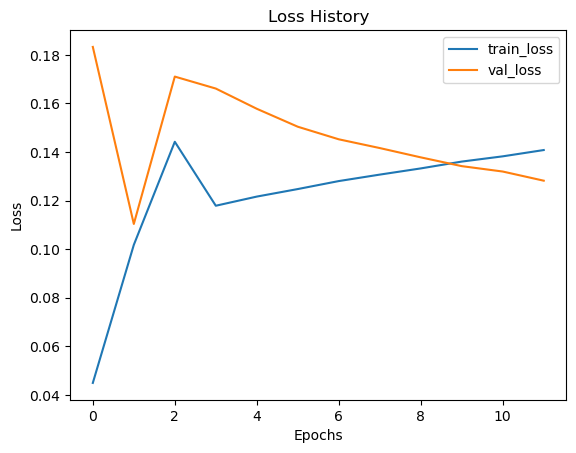

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

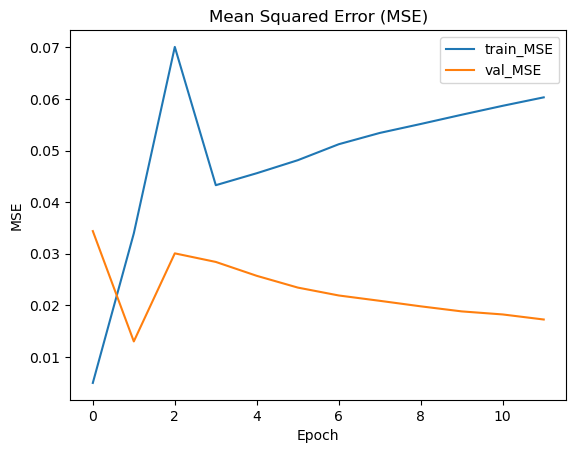

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

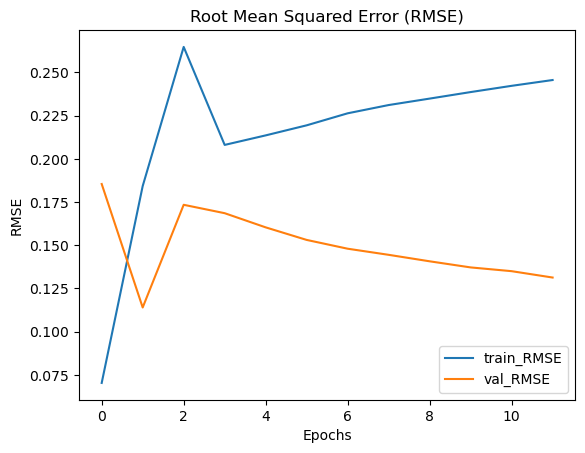

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

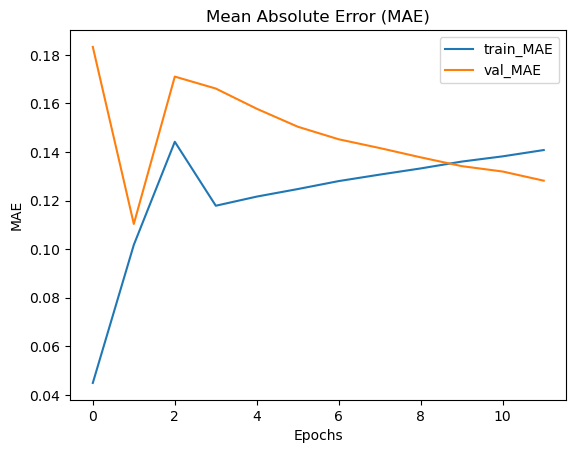

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

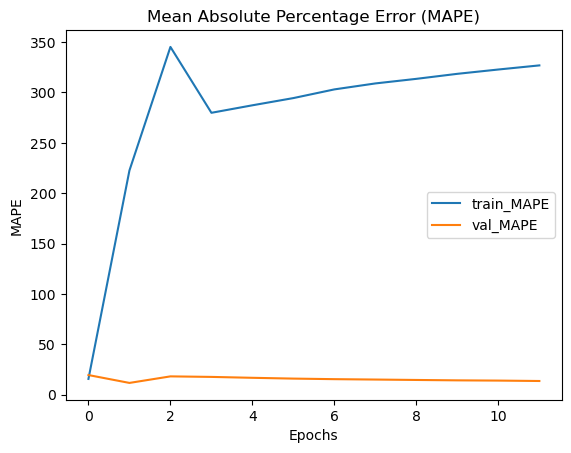

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:56:53.694142: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


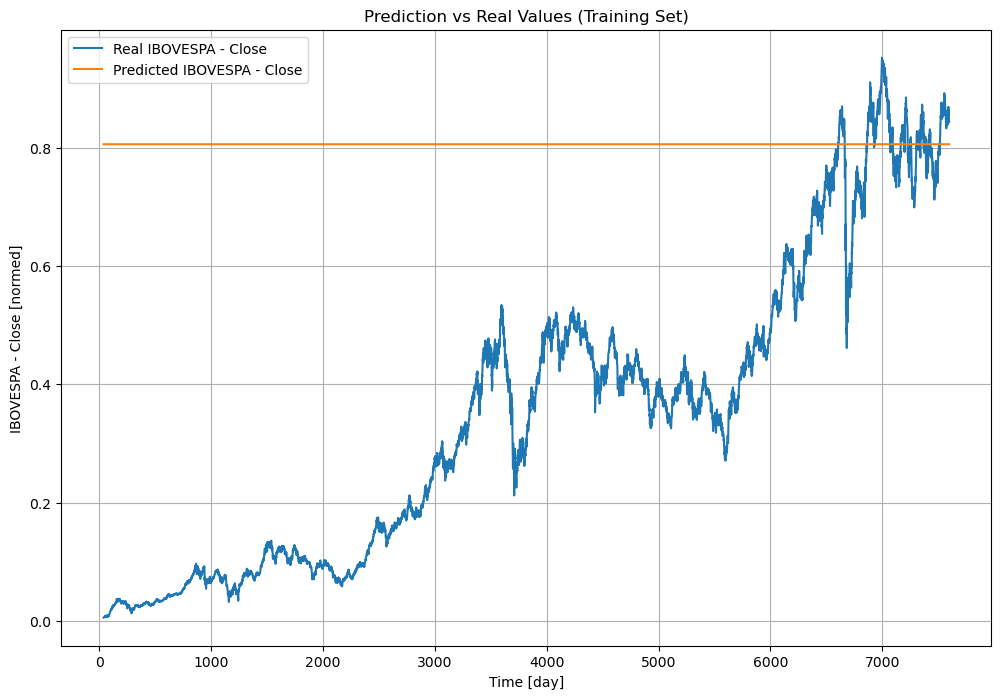

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


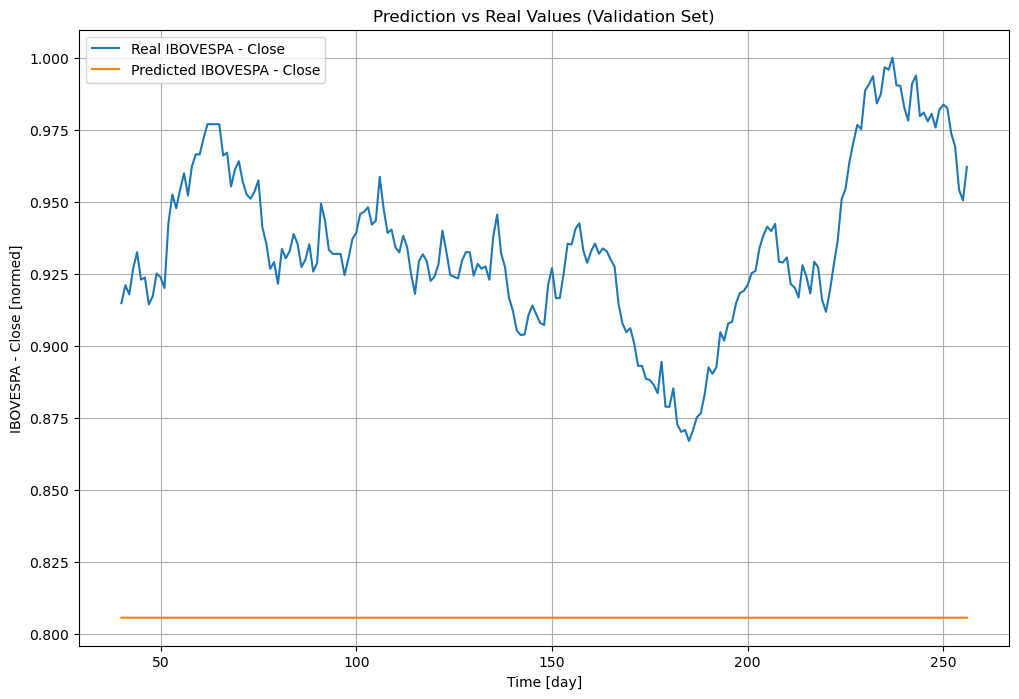

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


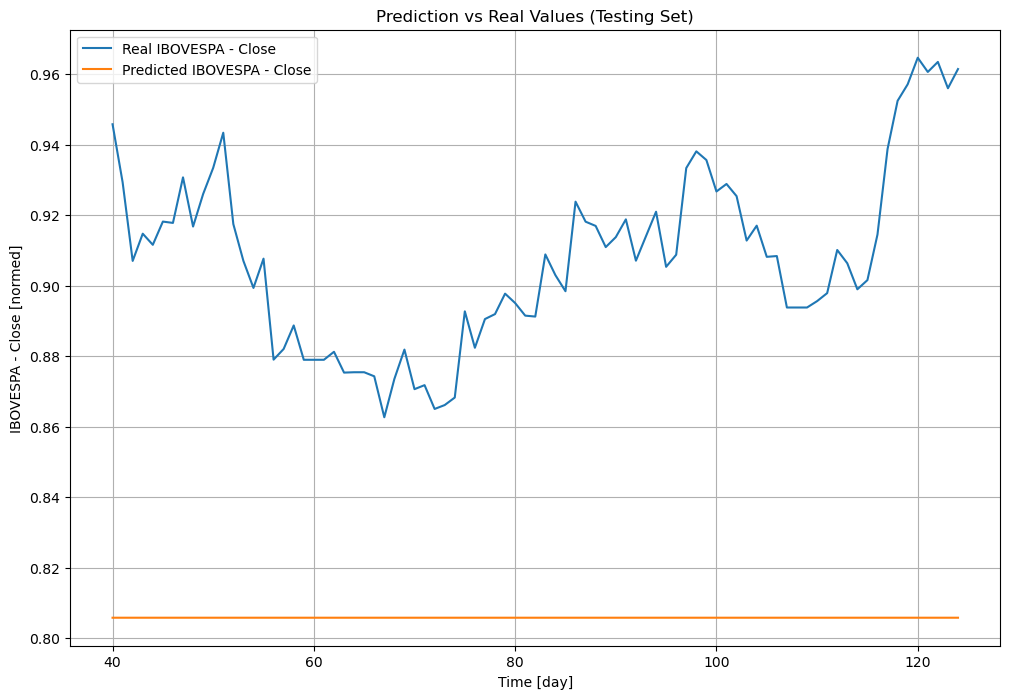

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

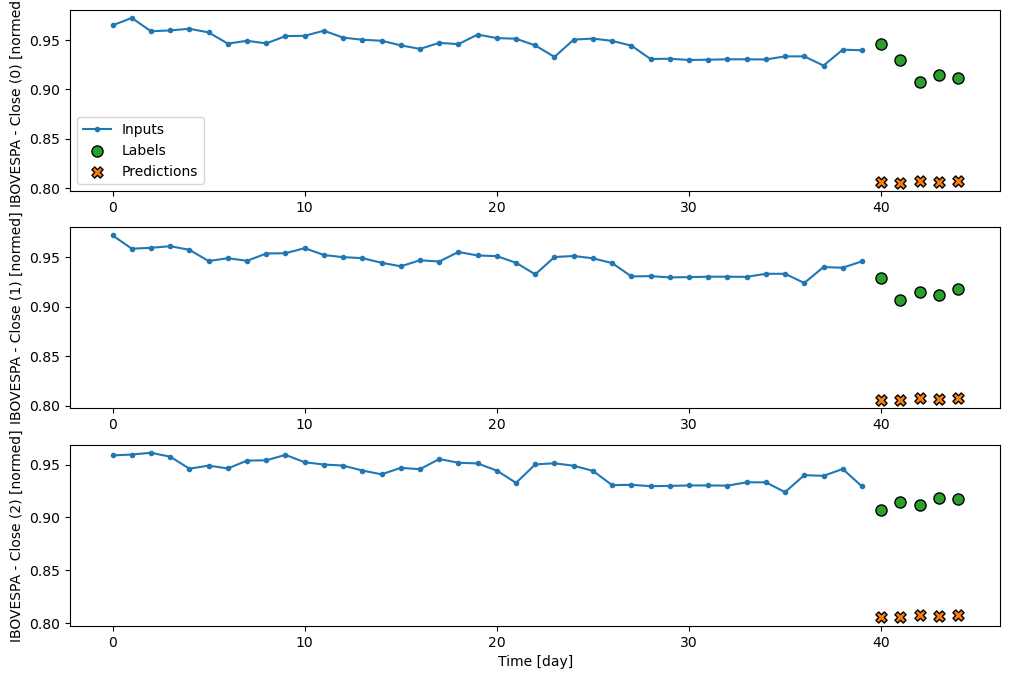

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:6s:719ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step


array([[[0.80576813, 0.80576813, 0.80576813, ..., 0.80576813,
         0.80576813, 0.80576813],
        [0.80557334, 0.80557334, 0.80557334, ..., 0.80557334,
         0.80557334, 0.80557334],
        [0.8075409 , 0.8075409 , 0.8075409 , ..., 0.8075409 ,
         0.8075409 , 0.8075409 ],
        [0.8067475 , 0.8067475 , 0.8067475 , ..., 0.8067475 ,
         0.8067475 , 0.8067475 ],
        [0.8077357 , 0.8077357 , 0.8077357 , ..., 0.8077357 ,
         0.80773556, 0.80773556]],

       [[0.80576813, 0.80576813, 0.80576813, ..., 0.80576813,
         0.80576813, 0.80576813],
        [0.80557334, 0.80557334, 0.80557334, ..., 0.80557334,
         0.80557334, 0.80557334],
        [0.8075409 , 0.8075409 , 0.8075409 , ..., 0.8075409 ,
         0.8075409 , 0.8075409 ],
        [0.8067475 , 0.8067475 , 0.8067475 , ..., 0.8067475 ,
         0.8067475 , 0.8067475 ],
        [0.8077357 , 0.8077357 , 0.8077357 , ..., 0.8077357 ,
         0.80773556, 0.80773556]],

       [[0.80576813, 0.80576813, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')